In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import os
import time

In [3]:
data_dir = '../data/train/'

train = pd.read_csv(data_dir + 'train_ratings.csv')
titles = pd.read_csv(data_dir + 'titles.tsv', sep='\t')
directors = pd.read_csv(data_dir + 'directors.tsv', sep='\t')
genres = pd.read_csv(data_dir + 'genres.tsv', sep='\t')
writers = pd.read_csv(data_dir + 'writers.tsv', sep='\t')
years = pd.read_csv(data_dir + 'years.tsv', sep='\t')
train.head()

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [4]:
train.shape

(5154471, 3)

train에서 feature 종류

In [5]:
train.nunique()

user      31360
item       6807
time    5074973
dtype: int64

user별 item 수

(array([1.030e+02, 8.257e+03, 5.589e+03, 3.936e+03, 2.892e+03, 2.125e+03,
        1.630e+03, 1.293e+03, 1.043e+03, 7.670e+02, 5.800e+02, 5.180e+02,
        4.440e+02, 3.690e+02, 2.460e+02, 2.230e+02, 2.060e+02, 1.630e+02,
        1.340e+02, 1.470e+02, 9.700e+01, 8.200e+01, 6.200e+01, 6.400e+01,
        4.600e+01, 4.900e+01, 4.200e+01, 3.400e+01, 2.600e+01, 1.700e+01,
        1.600e+01, 2.400e+01, 1.700e+01, 9.000e+00, 8.000e+00, 1.100e+01,
        1.000e+01, 6.000e+00, 1.200e+01, 7.000e+00, 8.000e+00, 7.000e+00,
        7.000e+00, 3.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 5.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

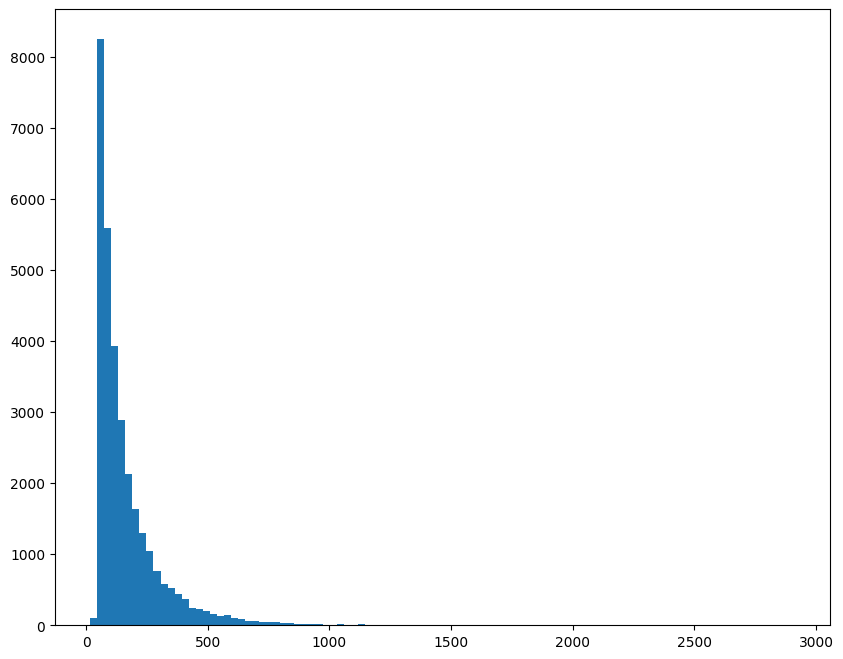

In [6]:
data = train.groupby('user').item.count().sort_values()
plt.figure(figsize=(10, 8))
plt.hist(data.values, bins=100)

In [7]:
data.describe()

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
Name: item, dtype: float64

In [8]:
data[data >= 1000]

user
133329    1000
28860     1005
50045     1012
15585     1017
80207     1019
          ... 
91349     1795
32514     1830
24219     1842
54465     1980
8405      2912
Name: item, Length: 111, dtype: int64

time feature를 알아볼 수 있도록 변경

In [9]:
train['timestamp'] = train['time'].apply(lambda x : time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))
train['year'] = train['time'].apply(lambda x : int(time.strftime('%Y', time.localtime(x))))
train['month'] = train['time'].apply(lambda x : int(time.strftime('%m', time.localtime(x))))
train['day'] = train['time'].apply(lambda x : int(time.strftime('%d', time.localtime(x))))
train['hour'] = train['time'].apply(lambda x : int(time.strftime('%H', time.localtime(x))))
train['minute'] = train['time'].apply(lambda x : int(time.strftime('%M', time.localtime(x))))
train['second'] = train['time'].apply(lambda x : int(time.strftime('%S', time.localtime(x))))
train.head()

,user,item,time,timestamp,year,month,day,hour,minute,second
0,11,4643,1230782529,2009-01-01 04:02:09,2009,1,1,4,2,9
1,11,170,1230782534,2009-01-01 04:02:14,2009,1,1,4,2,14
2,11,531,1230782539,2009-01-01 04:02:19,2009,1,1,4,2,19
3,11,616,1230782542,2009-01-01 04:02:22,2009,1,1,4,2,22
4,11,2140,1230782563,2009-01-01 04:02:43,2009,1,1,4,2,43


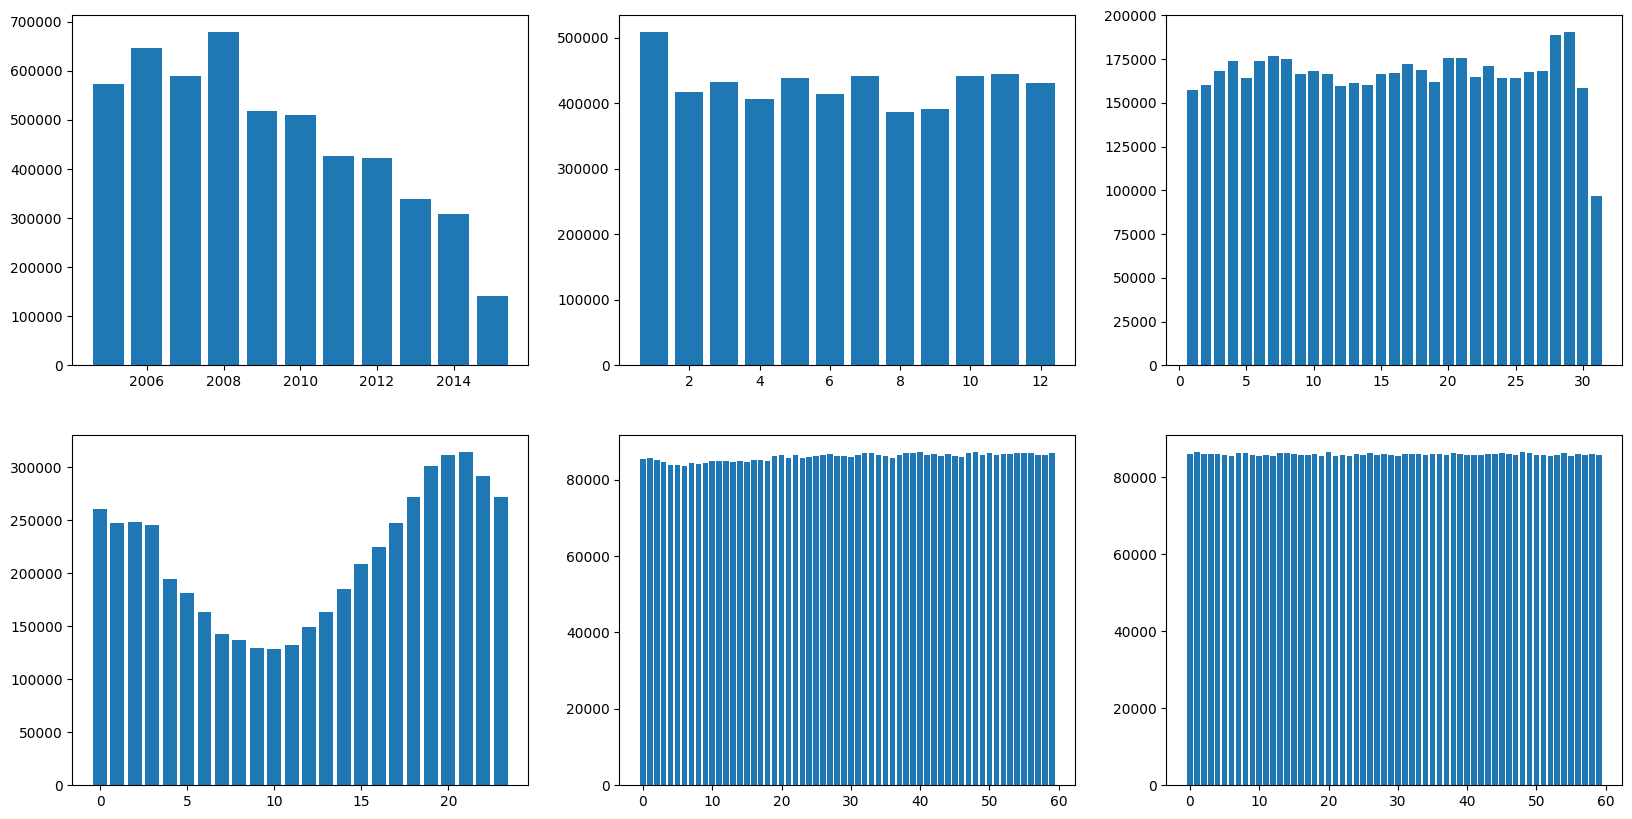

In [10]:
plt.figure(figsize=(20,10))
index = 1
for col in ['year', 'month', 'day', 'hour', 'minute', 'second'] :
    data = train[col].value_counts().sort_index()
    plt.subplot(2, 3, index)
    plt.bar(data.index, data.values)
    
    index += 1


item의 title 중복 확인

In [11]:
titles.nunique()

item     6807
title    6806
dtype: int64

In [12]:
titles.groupby('item').title.nunique().max()

1

In [13]:
train = pd.merge(train, titles, on='item', how='left')
train.head()

,user,item,time,timestamp,year,month,day,hour,minute,second,title
0,11,4643,1230782529,2009-01-01 04:02:09,2009,1,1,4,2,9,Planet of the Apes (2001)
1,11,170,1230782534,2009-01-01 04:02:14,2009,1,1,4,2,14,Hackers (1995)
2,11,531,1230782539,2009-01-01 04:02:19,2009,1,1,4,2,19,"Secret Garden, The (1993)"
3,11,616,1230782542,2009-01-01 04:02:22,2009,1,1,4,2,22,"Aristocats, The (1970)"
4,11,2140,1230782563,2009-01-01 04:02:43,2009,1,1,4,2,43,"Dark Crystal, The (1982)"


item의 year 중복 확인

In [14]:
years.nunique()

item    6799
year      93
dtype: int64

In [15]:
years.groupby('item').year.nunique().max()

1

In [16]:
years.columns = ['item', 'movie_year']
train = pd.merge(train, years, how='left', on='item')
train.head()

,user,item,time,timestamp,year,month,day,hour,minute,second,title,movie_year
0,11,4643,1230782529,2009-01-01 04:02:09,2009,1,1,4,2,9,Planet of the Apes (2001),2001.0
1,11,170,1230782534,2009-01-01 04:02:14,2009,1,1,4,2,14,Hackers (1995),1995.0
2,11,531,1230782539,2009-01-01 04:02:19,2009,1,1,4,2,19,"Secret Garden, The (1993)",1993.0
3,11,616,1230782542,2009-01-01 04:02:22,2009,1,1,4,2,22,"Aristocats, The (1970)",1970.0
4,11,2140,1230782563,2009-01-01 04:02:43,2009,1,1,4,2,43,"Dark Crystal, The (1982)",1982.0


<BarContainer object of 93 artists>

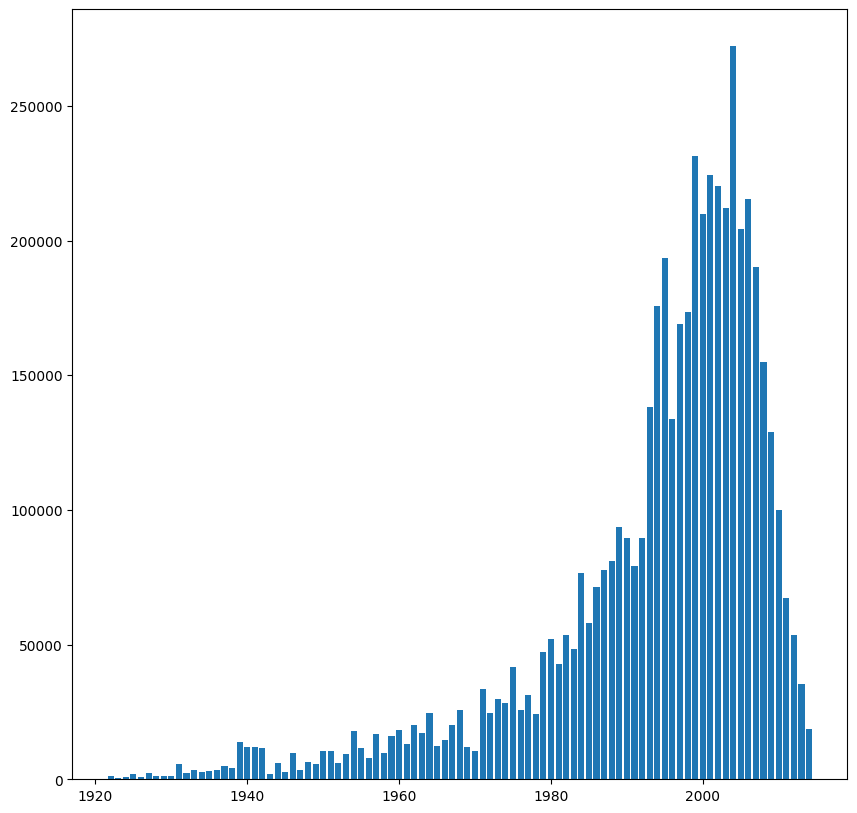

In [17]:
data = train.movie_year.value_counts().sort_index()
plt.figure(figsize=(10,10))
#plt.hist(data)
plt.bar(data.index, data.values)

<BarContainer object of 95 artists>

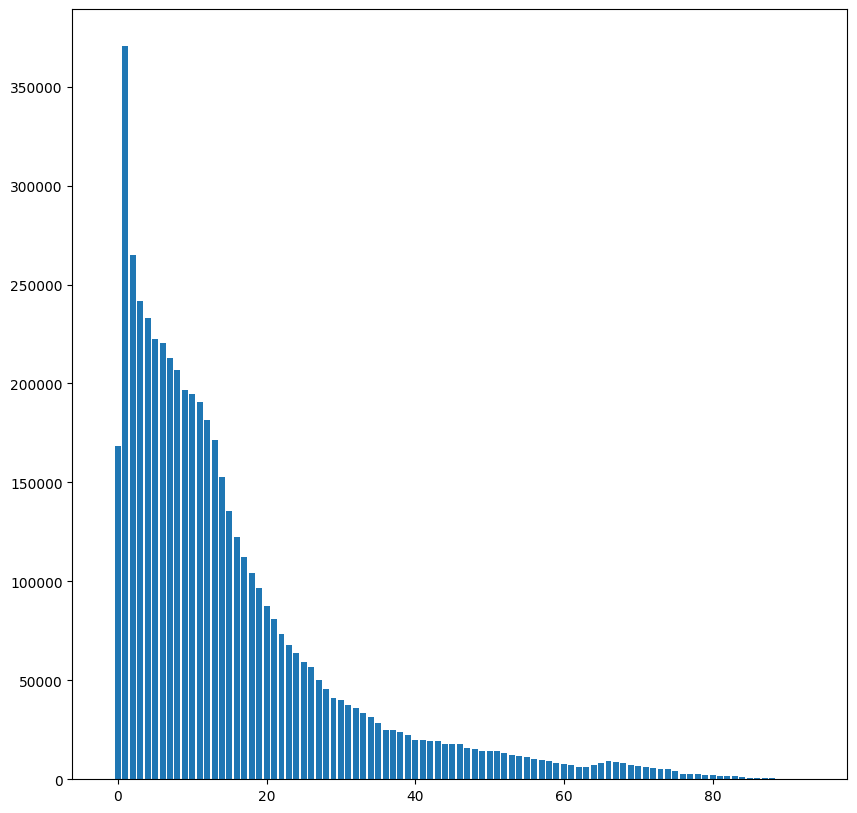

In [18]:
#train['long'] = train[['year', 'movie_year']].apply(lambda x : x[0] - x[1], axis=1)
train['long'] = train['year'] - train['movie_year']
data = train.groupby('long').item.count()
plt.figure(figsize=(10,10))
plt.bar(data.index, data.values)

item의 director 중복 확인

In [19]:
directors.nunique()

item        5503
director    1340
dtype: int64

In [20]:
director_counts = directors.groupby('item').director.nunique().sort_values()
director_counts

item
1         1
26163     1
26158     1
26151     1
26150     1
         ..
7502      7
71823     7
27002     8
1282     10
50912    14
Name: director, Length: 5503, dtype: int64

In [21]:
ones = director_counts[director_counts == 1].index

f"{len(ones) / train.item.nunique() * 100: .2f}%, {len(train[train.item.isin(ones)].item) / len(train.item) * 100 : .2f}%"

' 76.69%,  86.91%'

In [22]:
rating_direct = {}
for d in directors.director.unique() :
    tmp = directors[directors.director == d].item.unique()
    rating_direct[d] = train[train.item.isin(tmp)].item.count()
rating_direct

{'nm0000005': 6360,
 'nm0000019': 3290,
 'nm0000033': 36859,
 'nm0000036': 1835,
 'nm0000037': 2814,
 'nm0000040': 50239,
 'nm0000041': 14451,
 'nm0000045': 265,
 'nm0000059': 263,
 'nm0000076': 2881,
 'nm0000078': 161,
 'nm0000080': 7189,
 'nm0000095': 24185,
 'nm0000108': 22198,
 'nm0000110': 5807,
 'nm0000114': 311,
 'nm0000116': 53624,
 'nm0000118': 10196,
 'nm0000122': 6008,
 'nm0000123': 3660,
 'nm0000126': 7177,
 'nm0000127': 6866,
 'nm0000134': 1994,
 'nm0000142': 32873,
 'nm0000149': 850,
 'nm0000154': 15426,
 'nm0000158': 4135,
 'nm0000165': 37916,
 'nm0000169': 627,
 'nm0000180': 8324,
 'nm0000184': 33057,
 'nm0000186': 15662,
 'nm0000200': 1190,
 'nm0000209': 2800,
 'nm0000217': 55303,
 'nm0000229': 130434,
 'nm0000230': 4432,
 'nm0000231': 16931,
 'nm0000233': 81880,
 'nm0000243': 746,
 'nm0000247': 10876,
 'nm0000255': 5632,
 'nm0000264': 7515,
 'nm0000265': 6807,
 'nm0000269': 6025,
 'nm0000277': 4299,
 'nm0000316': 15266,
 'nm0000318': 51470,
 'nm0000320': 2836,
 'nm000

In [23]:
direct_count = directors.groupby('director').item.count().sort_values(ascending=False)
direct_count

director
nm0000095    44
nm0000033    33
nm0000142    31
nm0000229    29
nm0000217    26
             ..
nm0404606     2
nm0405605     2
nm0410139     2
nm0410769     2
nm9054338     2
Name: item, Length: 1340, dtype: int64

nm0000005 : 334.7368421052632
nm0000019 : 365.55555555555554
nm0000033 : 1116.939393939394
nm0000036 : 229.375
nm0000037 : 703.5
nm0000040 : 4186.583333333333
nm0000041 : 760.578947368421
nm0000045 : 132.5
nm0000059 : 87.66666666666667
nm0000076 : 320.1111111111111
nm0000078 : 80.5
nm0000080 : 718.9
nm0000095 : 549.6590909090909
nm0000108 : 2774.75
nm0000110 : 645.2222222222222
nm0000114 : 103.66666666666667
nm0000116 : 7660.571428571428
nm0000118 : 599.7647058823529
nm0000122 : 667.5555555555555
nm0000123 : 915.0
nm0000126 : 2392.3333333333335
nm0000127 : 490.42857142857144
nm0000134 : 997.0
nm0000142 : 1060.4193548387098
nm0000149 : 212.5
nm0000154 : 3856.5
nm0000158 : 1033.75
nm0000165 : 1895.8
nm0000169 : 313.5
nm0000180 : 924.8888888888889
nm0000184 : 5509.5
nm0000186 : 1566.2
nm0000200 : 595.0
nm0000209 : 933.3333333333334
nm0000217 : 2127.0384615384614
nm0000229 : 4497.724137931034
nm0000230 : 738.6666666666666
nm0000231 : 1058.1875
nm0000233 : 7443.636363636364
nm0000243 : 373.

(array([467., 250., 140., 119.,  72.,  47.,  27.,  29.,  23.,  22.,  19.,
         22.,  15.,  14.,   8.,   6.,   6.,   6.,   6.,   3.,   2.,   5.,
          3.,   2.,   3.,   4.,   2.,   0.,   2.,   1.,   0.,   4.,   1.,
          0.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   2.,   2.,   1.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([  48.  ,  216.24,  384.48,  552.72,  720.96,  889.2 , 1057.44,
        1225.68, 1393.92, 1562.16, 1730.4 , 1898.64, 2066.88, 2235.12,
        2403.36, 2571.6 , 2739.84, 2908.08, 3076.32, 3244.56, 3412.8 ,
        3581.04, 3749.28, 3917.52, 4085.76, 4254.  , 4422.24, 4590.48,
        4758.72, 4926.96, 5095.2 , 5263.44, 5431.68, 5599.92, 5768.16,
        5936.4 , 6104.64, 6272.88, 6441.12, 6609.36, 6777.6 , 6945.84,
        7114.08, 7282.32, 7450.56, 7618.8 , 7787.04, 7955.28, 8123.52,
        8291.76, 8460.  ]),
 <BarContainer object of 50 artists>)

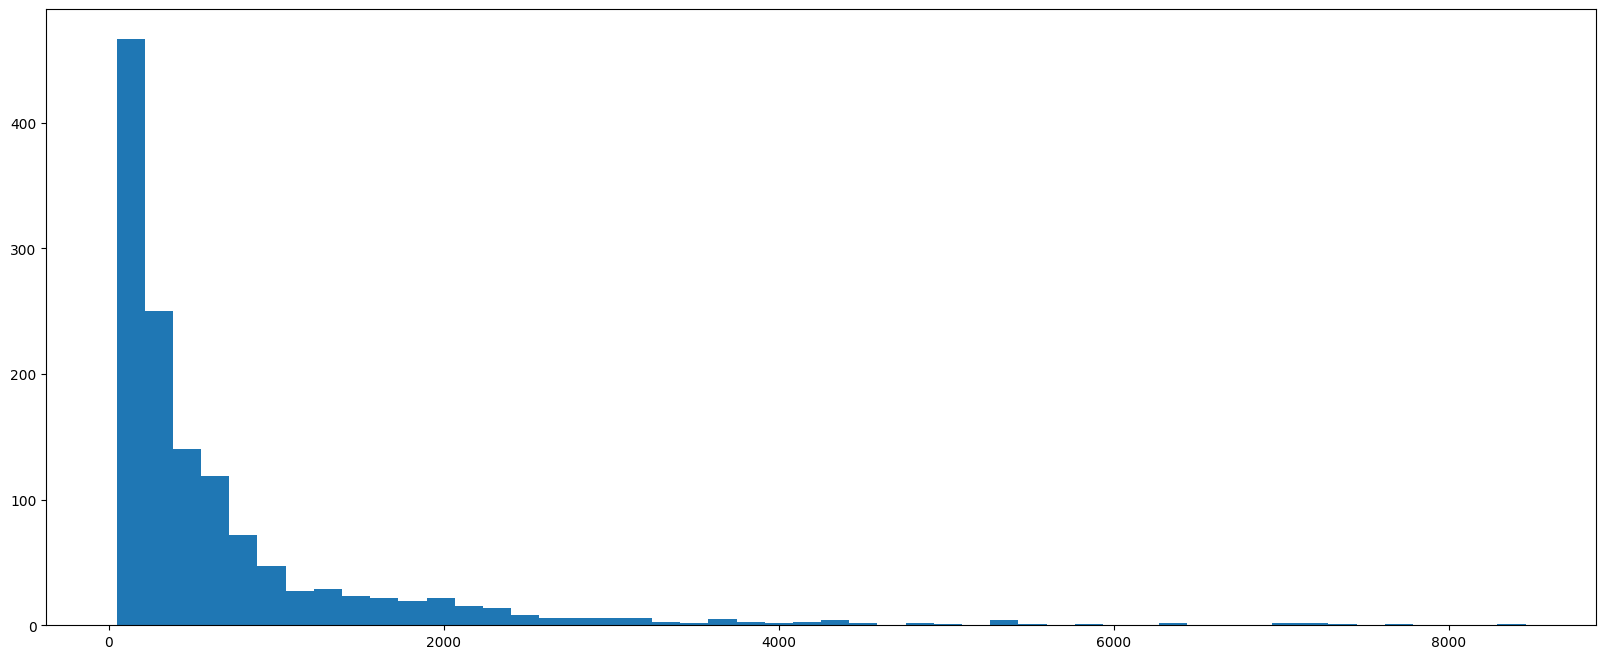

In [24]:
data = {}
for i in rating_direct.keys() :
    print(f"{i} : {rating_direct[i] / direct_count[i]}")
    data[i] = rating_direct[i] / direct_count[i]
plt.figure(figsize=(20,8))
plt.hist(sorted(data.values()), bins=50)

writers

In [25]:
writers.nunique()

item      5648
writer    2989
dtype: int64

In [26]:
writer_counts = writers.groupby('item').writer.nunique().sort_values()
writer_counts

item
5463      1
6567      1
6583      1
6586      1
6592      1
         ..
48322    19
364      21
2687     21
783      23
1907     24
Name: writer, Length: 5648, dtype: int64

In [27]:
ones = writer_counts[writer_counts == 1].index

f"{len(ones) / train.item.nunique() * 100: .2f}%, {len(train[train.item.isin(ones)].item) / len(train.item) * 100 : .2f}%"

' 39.08%,  35.50%'

genres

In [28]:
genres.nunique()

item     6807
genre      18
dtype: int64

In [29]:
rating_genre = {}
for g in genres.genre.unique() :
    tmp = genres[genres.genre == g].item.unique()
    rating_genre[g] = train[train.item.isin(tmp)].item.count()
rating_genre

{'Crime': 1014480,
 'Drama': 2511407,
 'Action': 1504902,
 'Sci-Fi': 857851,
 'Thriller': 1435678,
 'Comedy': 1719017,
 'Romance': 893843,
 'War': 307170,
 'Adventure': 1203283,
 'Fantasy': 617807,
 'Horror': 343730,
 'Mystery': 493005,
 'Animation': 370761,
 'Children': 397929,
 'Film-Noir': 70402,
 'Musical': 199635,
 'Western': 95374,
 'Documentary': 90050}

In [30]:
genres_count = genres.groupby('genre').item.count().sort_values()
genres_count

genre
Film-Noir        97
Western         139
Musical         282
Documentary     323
War             346
Animation       355
Children        432
Mystery         471
Fantasy         557
Horror          602
Sci-Fi          653
Adventure       891
Crime           924
Action         1246
Romance        1251
Thriller       1466
Comedy         2408
Drama          3490
Name: item, dtype: int64

Crime  : 1097.922077922078
Drama  : 719.6008595988538
Action  : 1207.7865168539327
Sci-Fi  : 1313.7075038284838
Thriller  : 979.3165075034107
Comedy  : 713.8774916943522
Romance  : 714.5027977617906
War  : 887.7745664739884
Adventure  : 1350.4859708193042
Fantasy  : 1109.168761220826
Horror  : 570.9800664451827
Mystery  : 1046.71974522293
Animation  : 1044.3971830985915
Children  : 921.1319444444445
Film-Noir  : 725.7938144329897
Musical  : 707.9255319148937
Western  : 686.1438848920864
Documentary  : 278.79256965944273


<BarContainer object of 18 artists>

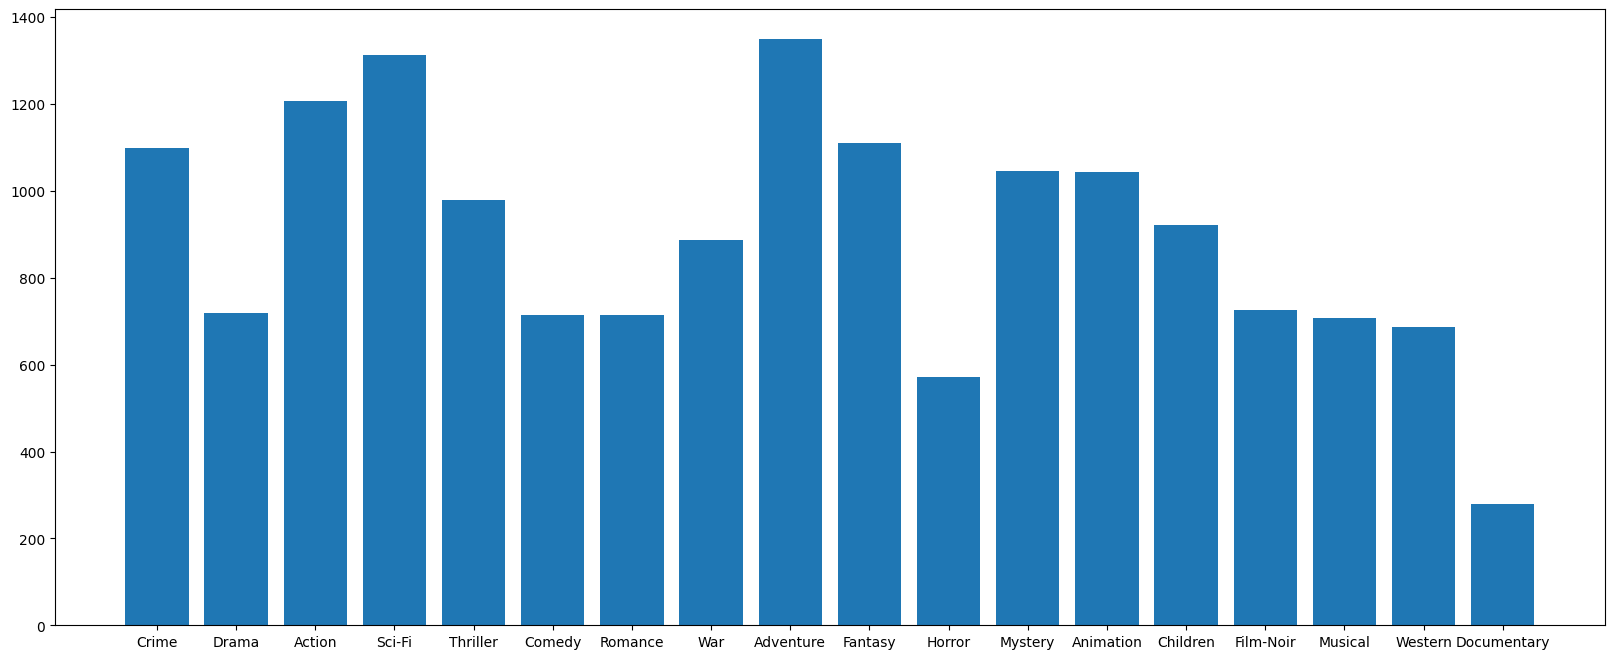

In [32]:
data = {}
for i in rating_genre.keys() :
    print(f"{i}  : {rating_genre[i] / genres_count[i]}")
    data[i] = rating_genre[i] / genres_count[i]
plt.figure(figsize=(20,8))
plt.bar(data.keys(), data.values())

2     2280
3     1786
1     1756
4      726
5      212
6       38
7        7
8        1
10       1
Name: genre, dtype: int64

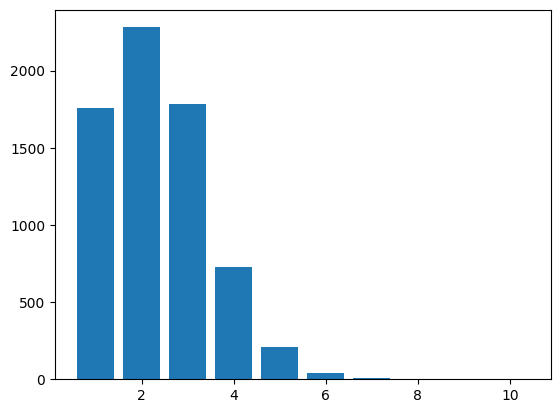

In [33]:
data = genres.groupby(['item']).genre.count().value_counts()
plt.bar(data.index, data.values)
data

user, genre별 수

In [34]:
data = pd.merge(train[['user', 'item']], genres, on='item', how='left')
data

,user,item,genre
0,11,4643,Action
1,11,4643,Adventure
2,11,4643,Drama
3,11,4643,Sci-Fi
4,11,170,Action
...,...,...,...
14126319,138493,27311,Action
14126320,138493,27311,Animation
14126321,138493,27311,Crime
14126322,138493,27311,Sci-Fi


In [35]:
data.groupby('user').genre.nunique().sort_values()

user
101958     9
124772    10
44357     10
35319     10
137079    10
          ..
69699     18
69702     18
69708     18
69237     18
138493    18
Name: genre, Length: 31360, dtype: int64

In [36]:
count = data[['user', 'genre']].value_counts()
genre_dict = {}
for user in data.user.unique() :
    genre_dict[user] = [i for i in count[user][:5].index]
genre_dict

{11: ['Sci-Fi', 'Action', 'Adventure', 'Thriller', 'Drama'],
 14: ['Comedy', 'Drama', 'Adventure', 'Children', 'Romance'],
 18: ['Drama', 'Comedy', 'Romance', 'Crime', 'Thriller'],
 25: ['Drama', 'Comedy', 'Action', 'Crime', 'Adventure'],
 31: ['Adventure', 'Action', 'Sci-Fi', 'Comedy', 'Fantasy'],
 35: ['Drama', 'Action', 'Thriller', 'Comedy', 'Crime'],
 43: ['Drama', 'Romance', 'Comedy', 'Action', 'Adventure'],
 50: ['Drama', 'Comedy', 'Romance', 'Action', 'Fantasy'],
 58: ['Drama', 'Comedy', 'Romance', 'Action', 'Thriller'],
 60: ['Adventure', 'Drama', 'Fantasy', 'Comedy', 'Action'],
 61: ['Drama', 'Comedy', 'Thriller', 'Romance', 'Adventure'],
 65: ['Drama', 'Romance', 'Thriller', 'Sci-Fi', 'Comedy'],
 72: ['Comedy', 'Drama', 'Action', 'Thriller', 'Romance'],
 77: ['Drama', 'Action', 'Sci-Fi', 'Adventure', 'Thriller'],
 82: ['Drama', 'Thriller', 'Crime', 'Action', 'Comedy'],
 85: ['Drama', 'Comedy', 'Romance', 'Adventure', 'Children'],
 90: ['Adventure', 'Comedy', 'Action', 'Drama'

In [37]:
df = pd.DataFrame(genre_dict).T.reset_index()
df.columns = ['user', 'first', 'second', 'third', 'forth', 'fifth']
df

,user,first,second,third,forth,fifth
0,11,Sci-Fi,Action,Adventure,Thriller,Drama
1,14,Comedy,Drama,Adventure,Children,Romance
2,18,Drama,Comedy,Romance,Crime,Thriller
3,25,Drama,Comedy,Action,Crime,Adventure
4,31,Adventure,Action,Sci-Fi,Comedy,Fantasy
...,...,...,...,...,...,...
31355,138473,Drama,Thriller,Crime,Action,Mystery
31356,138475,Drama,Crime,Film-Noir,Thriller,Romance
31357,138486,Thriller,Horror,Comedy,Action,Adventure
31358,138492,Comedy,Drama,Romance,Action,Adventure


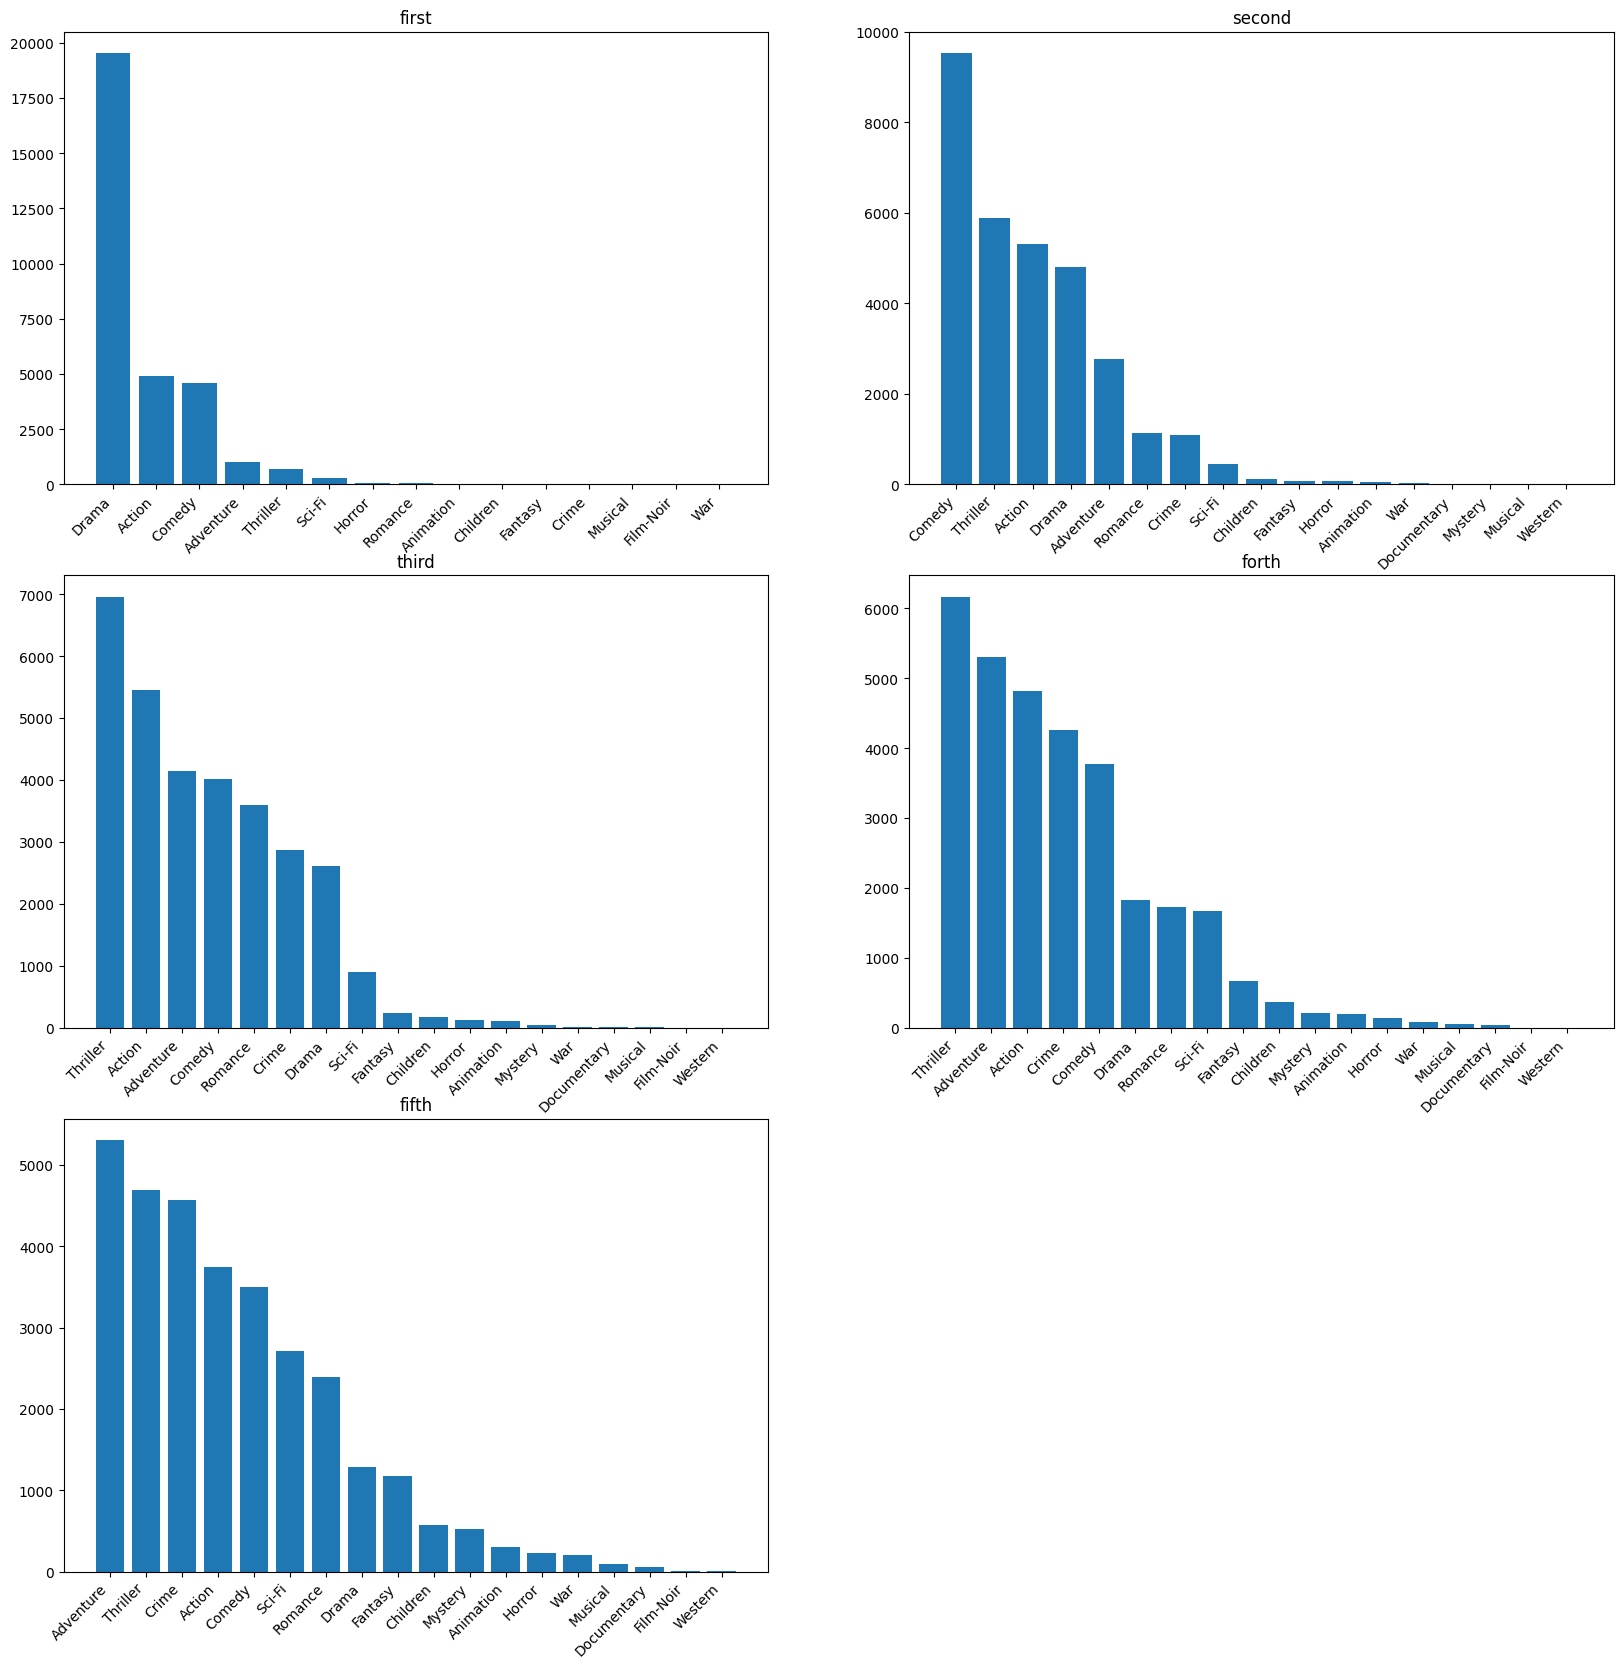

In [38]:
plt.figure(figsize=(20,20))
index = 1
for col in ['first', 'second', 'third', 'forth', 'fifth'] :
    d = df[col].value_counts()
    plt.subplot(3, 2, index)
    plt.bar(d.index, d.values)
    plt.xticks(rotation=45, ha='right')
    plt.title(col)
    index += 1

In [39]:
df.iloc[:, 1:].value_counts()[:10]

first  second    third     forth      fifth    
Drama  Comedy    Romance   Thriller   Crime        478
                 Action    Thriller   Adventure    442
                 Thriller  Crime      Action       414
       Thriller  Crime     Action     Comedy       403
       Comedy    Thriller  Action     Crime        392
                 Action    Adventure  Thriller     343
       Thriller  Action    Crime      Comedy       335
       Comedy    Romance   Crime      Thriller     325
                 Action    Thriller   Crime        281
                 Thriller  Crime      Romance      280
dtype: int64

genre별 선호되는 시간대

In [40]:
data = pd.merge(train[['user', 'item', 'year', 'month', 'hour']], genres, on='item', how='left')
data

,user,item,year,month,hour,genre
0,11,4643,2009,1,4,Action
1,11,4643,2009,1,4,Adventure
2,11,4643,2009,1,4,Drama
3,11,4643,2009,1,4,Sci-Fi
4,11,170,2009,1,4,Action
...,...,...,...,...,...,...
14126319,138493,27311,2009,12,18,Action
14126320,138493,27311,2009,12,18,Animation
14126321,138493,27311,2009,12,18,Crime
14126322,138493,27311,2009,12,18,Sci-Fi


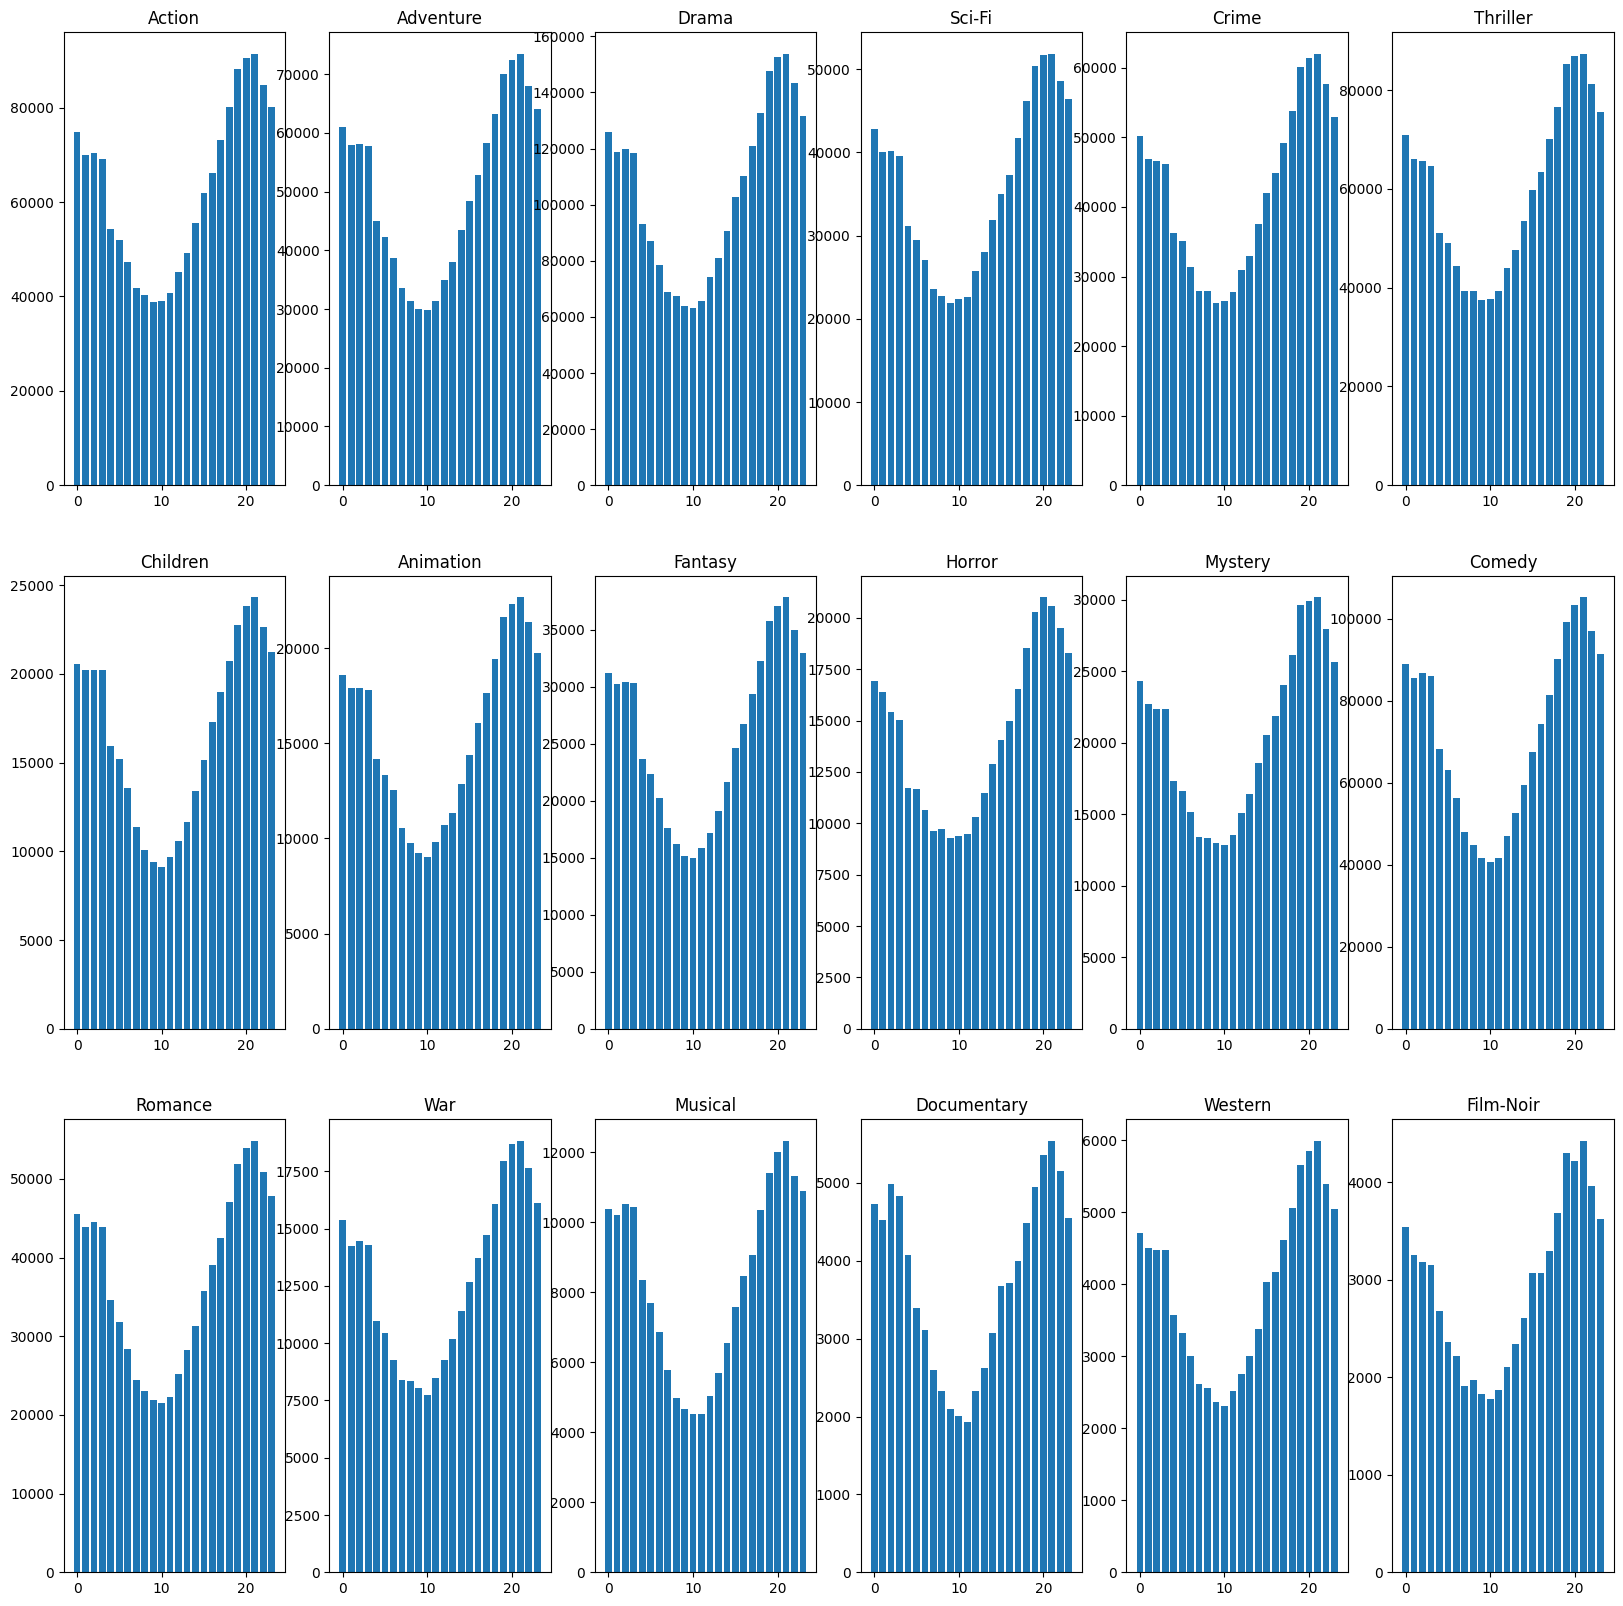

In [41]:
count = data[['genre', 'hour']].value_counts()

plt.figure(figsize=(20,20))
index = 1
for g in data.genre.unique() :
    d = count[g]

    plt.subplot(3, 6, index)
    plt.bar(d.index, d.values)
    plt.title(g)
    index += 1

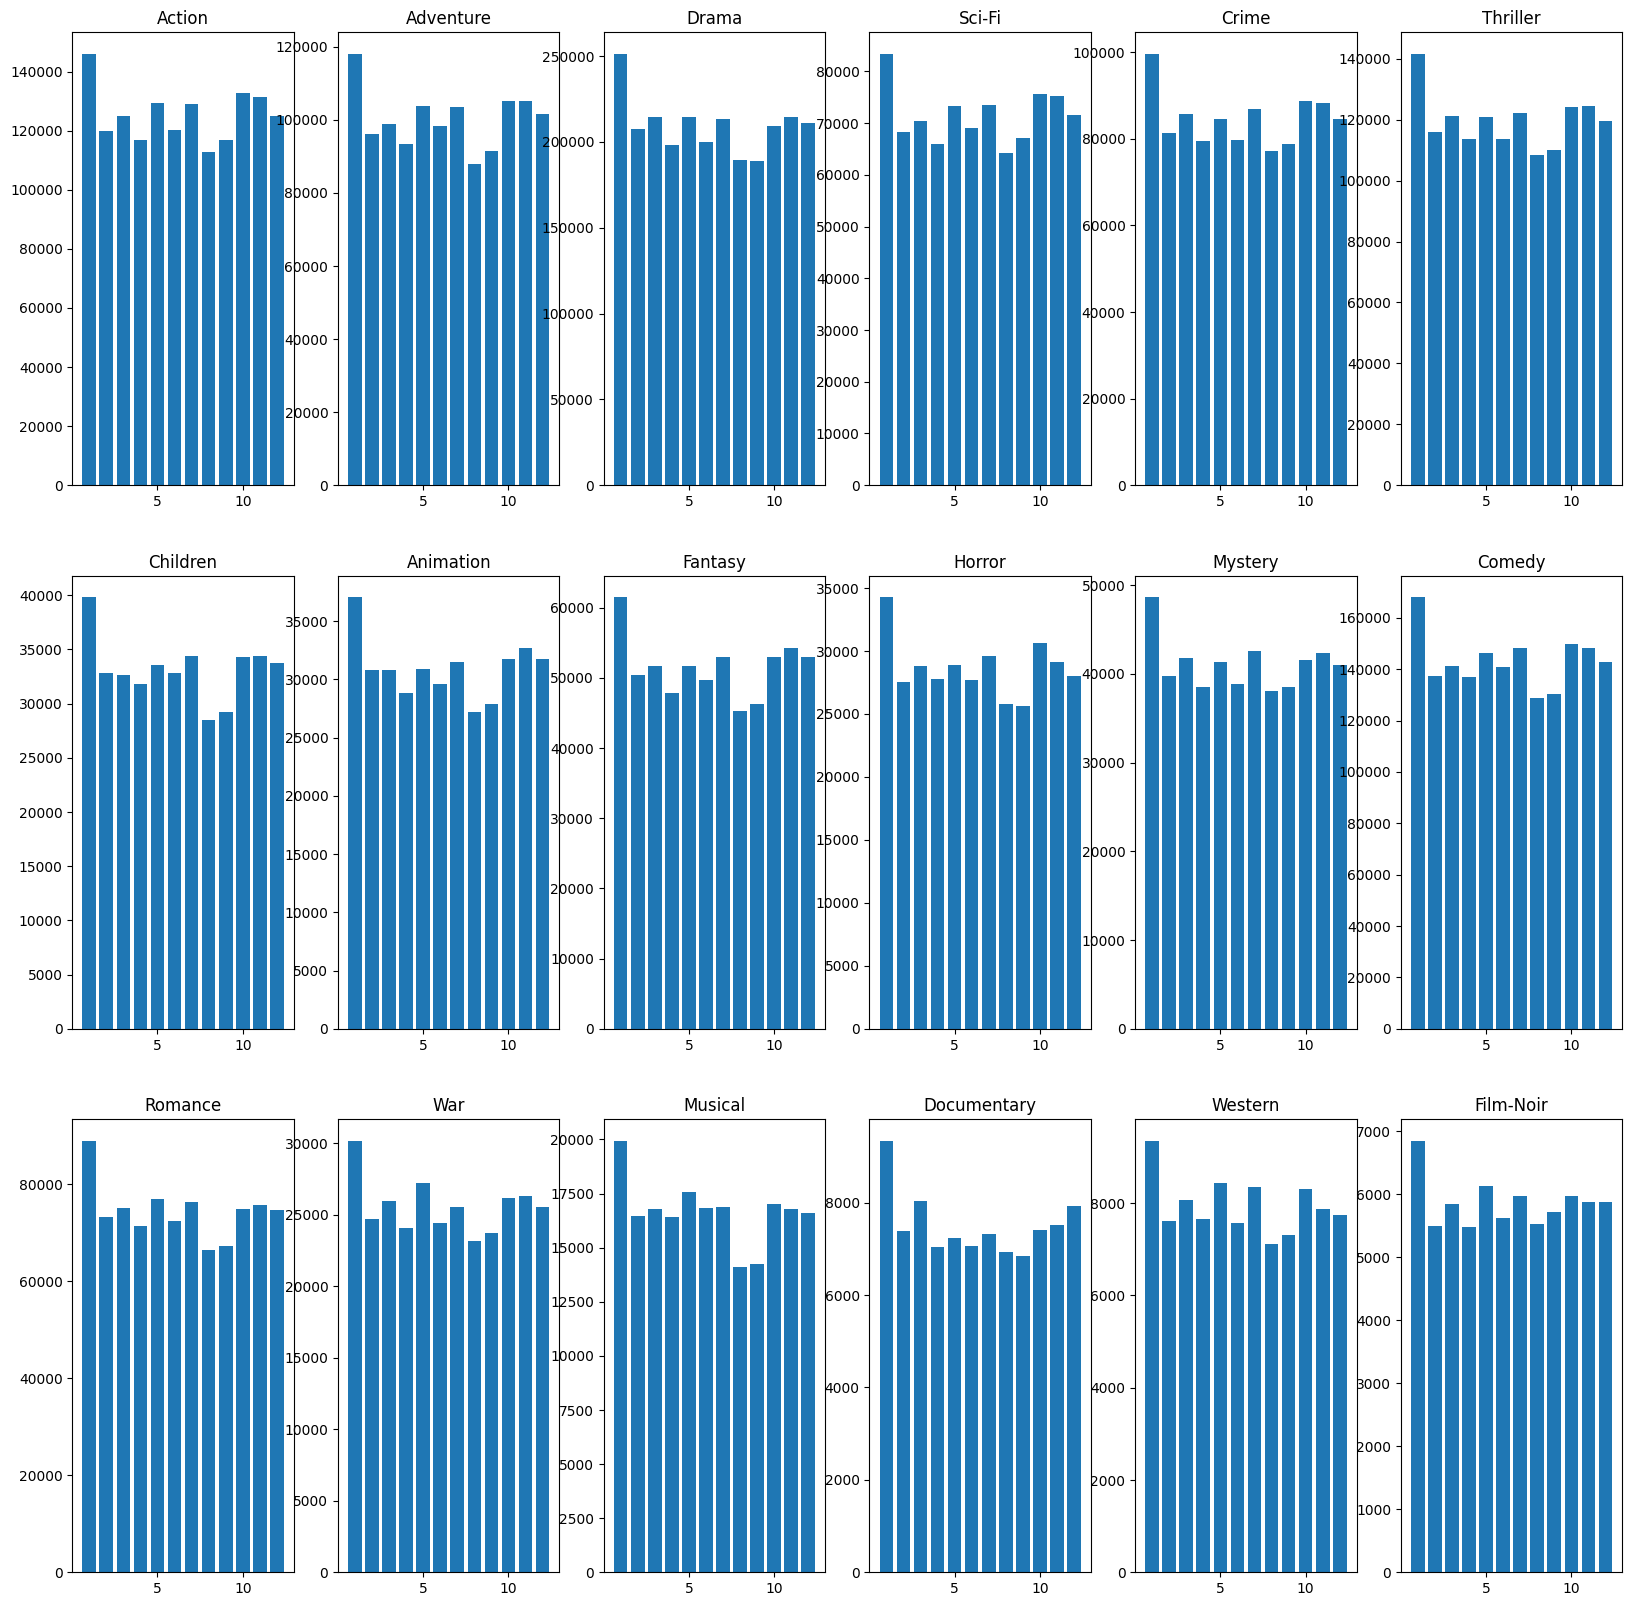

In [42]:
count = data[['genre', 'month']].value_counts()

plt.figure(figsize=(20,20))
index = 1
for g in data.genre.unique() :
    d = count[g]

    plt.subplot(3, 6, index)
    plt.bar(d.index, d.values)
    plt.title(g)
    index += 1

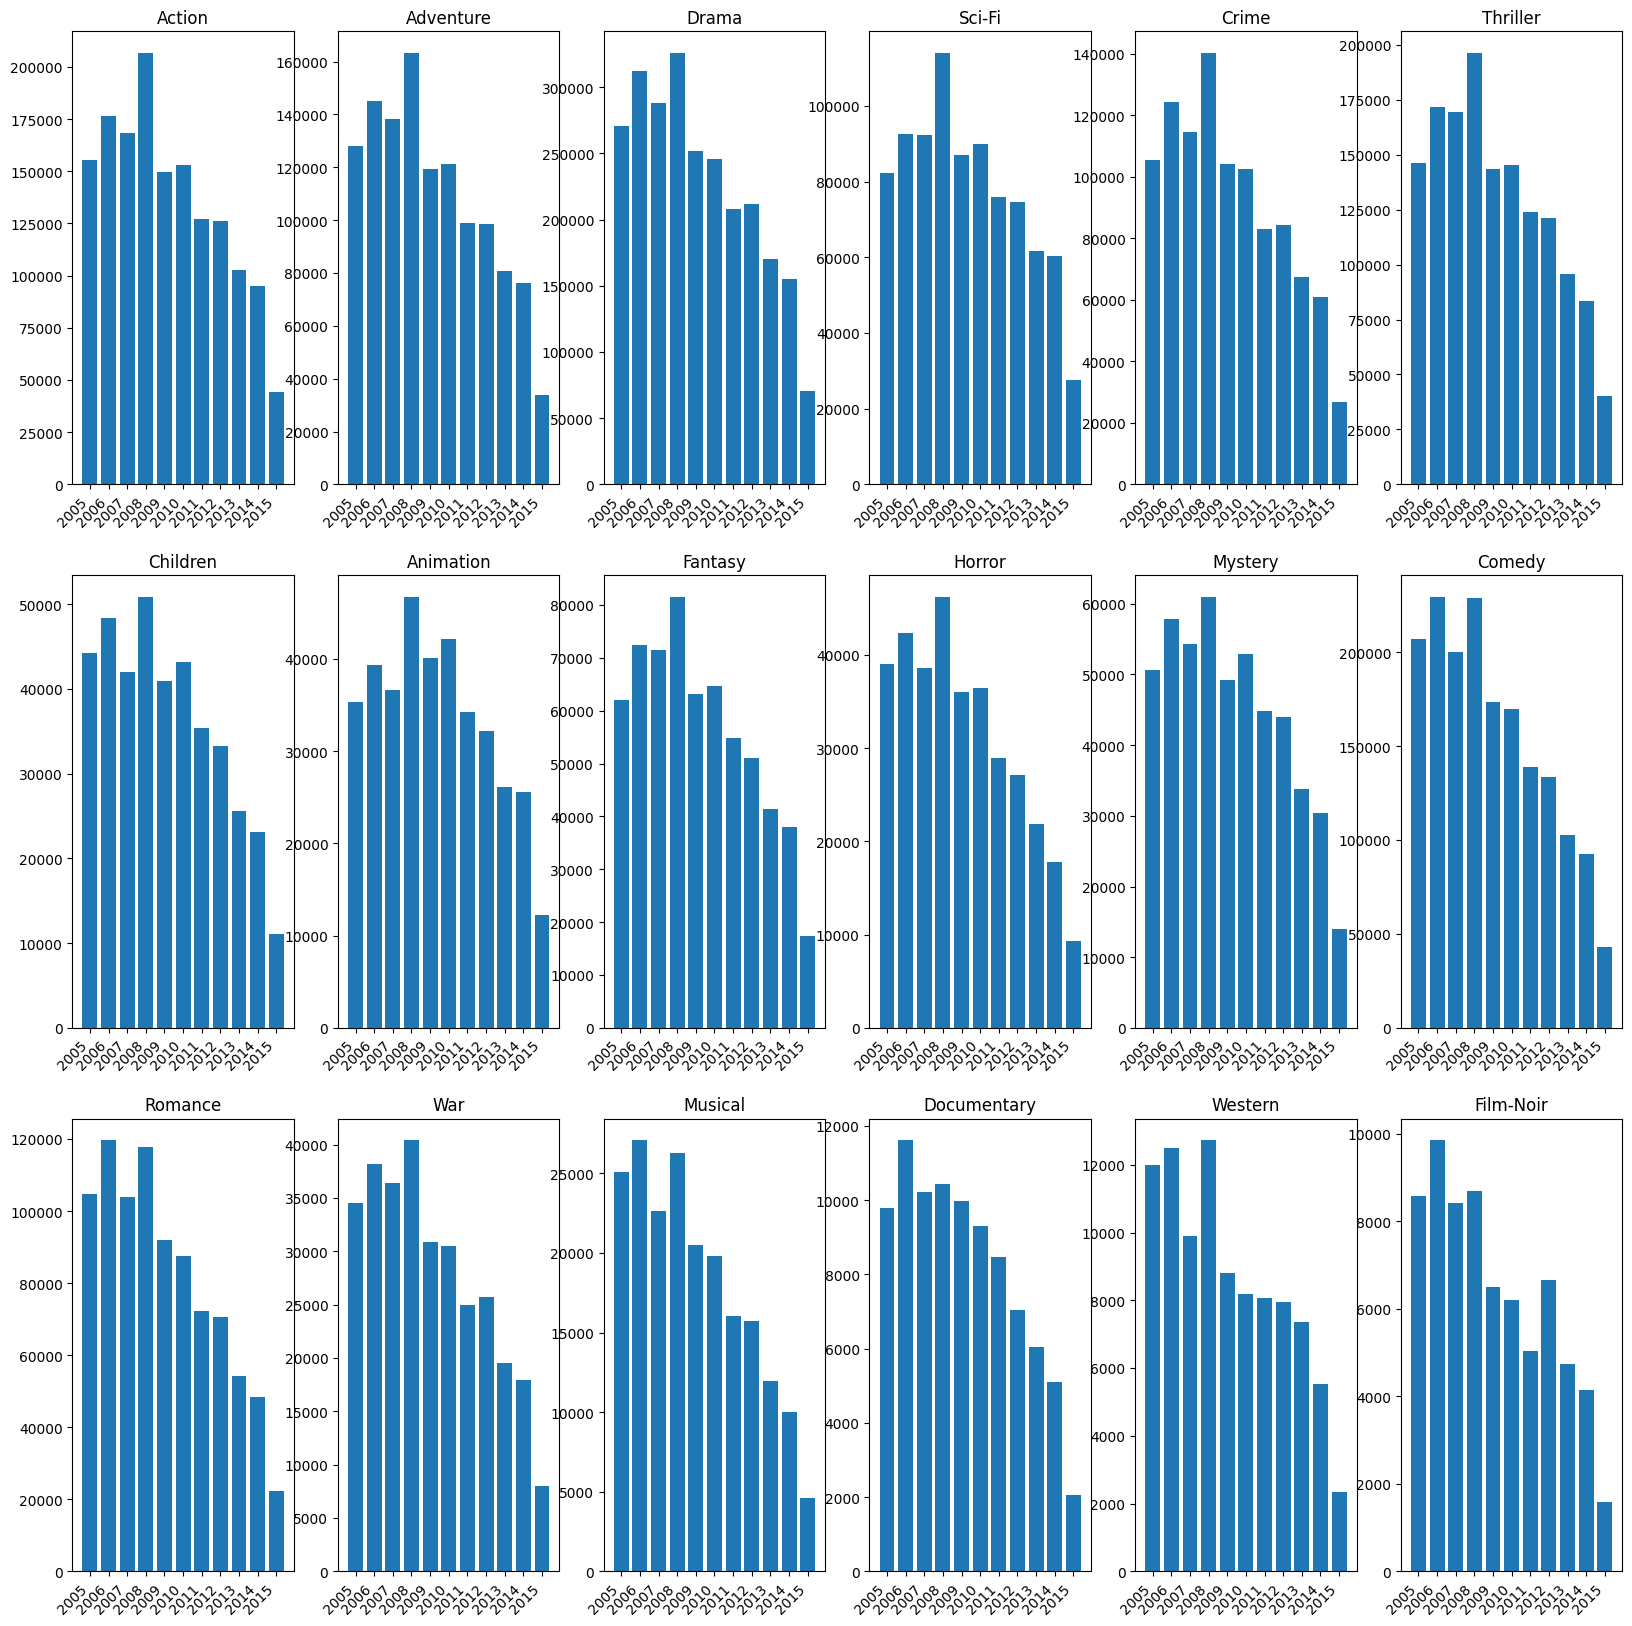

In [43]:
count = data[['genre', 'year']].value_counts()

plt.figure(figsize=(20,20))
index = 1
for g in data.genre.unique() :
    d = count[g]

    plt.subplot(3, 6, index)
    plt.bar(d.index, d.values)
    plt.title(g)
    plt.xticks(d.index, rotation=45, ha='right')
    index += 1

director 수에 따른 interaction의 수

In [44]:
count = directors.groupby('item').director.count()
count_dict = {i:train[train.item.isin(count[count == i].index)].user.count() for i in range(1, count.max()+1)}
count_dict[0] = train[train.item.isin(set(train.item.values) - set(count.index))].user.count()
count_dict

{1: 4479676,
 2: 280838,
 3: 64610,
 4: 6557,
 5: 3671,
 6: 9290,
 7: 4749,
 8: 265,
 9: 0,
 10: 2635,
 11: 0,
 12: 0,
 13: 0,
 14: 735,
 0: 301445}

<BarContainer object of 15 artists>

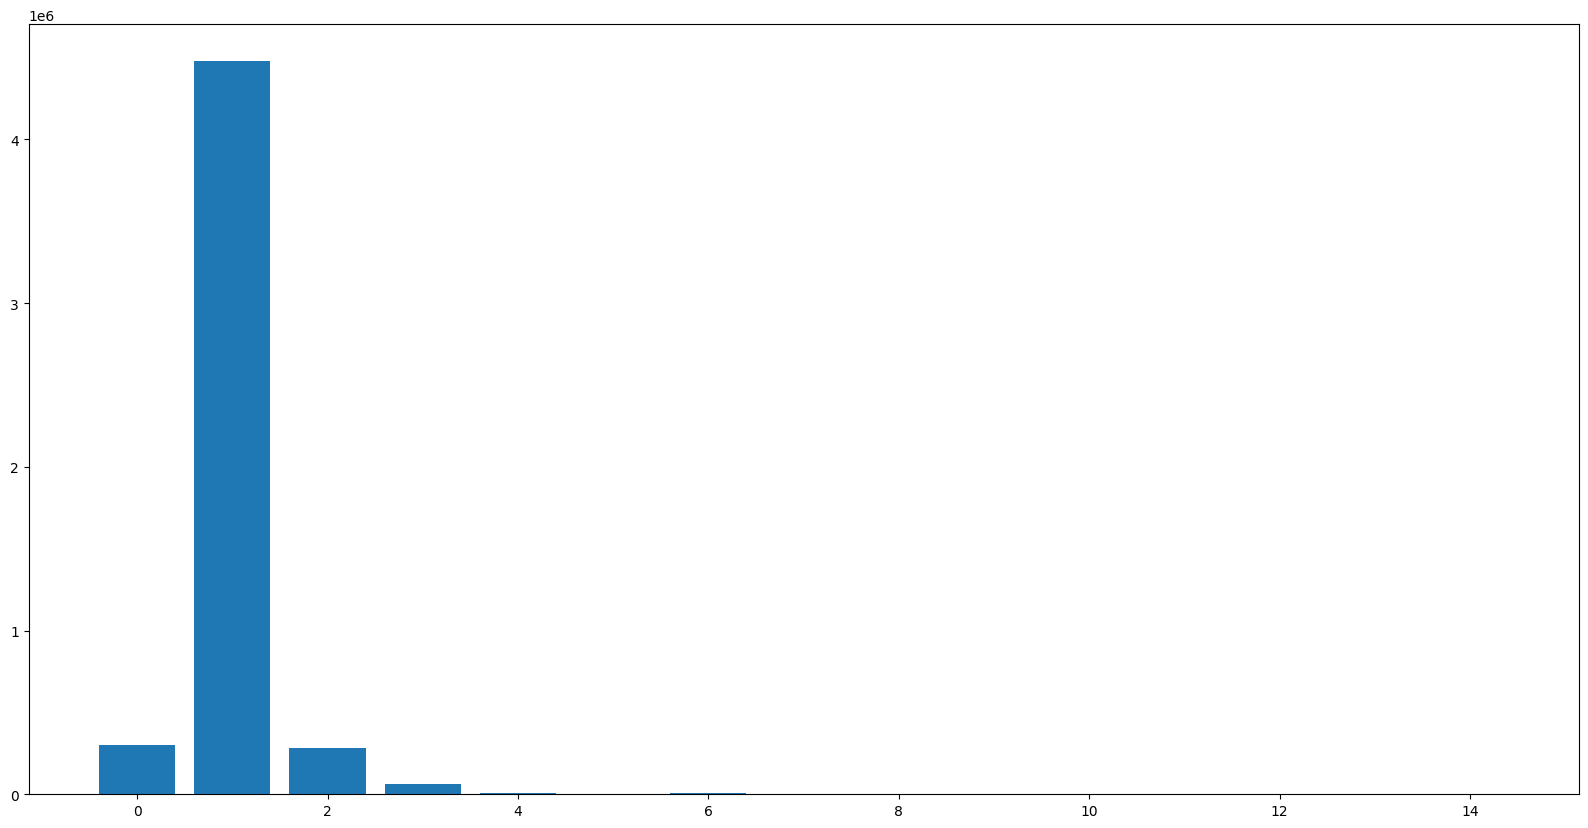

In [45]:
plt.figure(figsize=(20, 10))
plt.bar(count_dict.keys(), count_dict.values())

<BarContainer object of 11 artists>

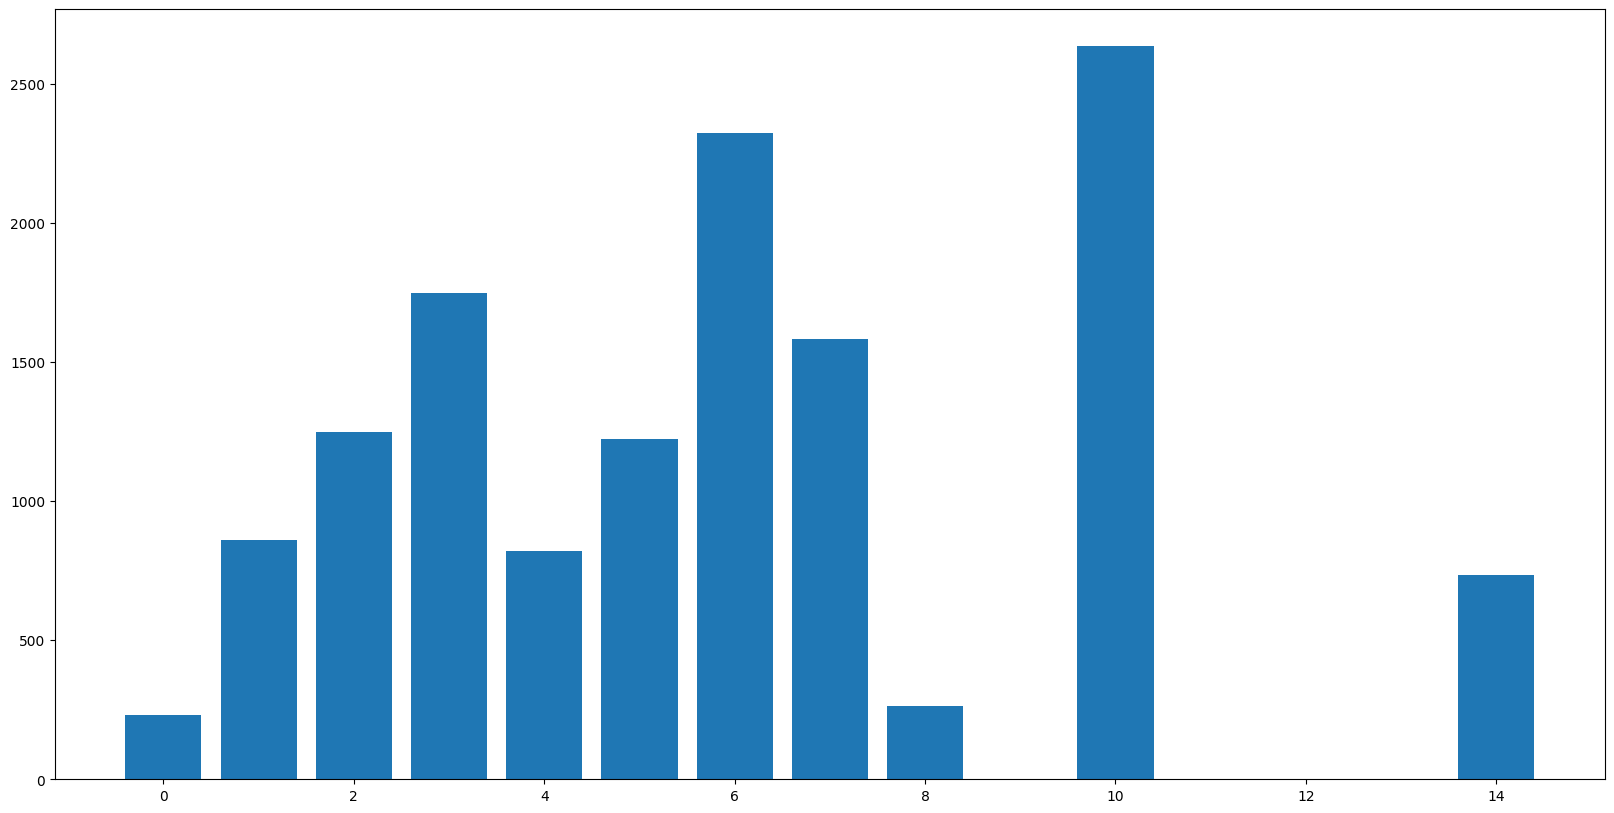

In [46]:
count = directors.groupby('item').director.count()
count_movie = directors.groupby('item').director.count().value_counts()
count_dict = {i:train[train.item.isin(count[count == i].index)].user.count() / count_movie[i] for i in set(count.values)}
count_dict[0] = train[train.item.isin(set(train.item.values) - set(count.index))].user.count() / train[train.item.isin(set(train.item.values) - set(count.index))].item.nunique()
plt.figure(figsize=(20, 10))
plt.bar(count_dict.keys(), count_dict.values())

In [47]:
directors.item.nunique()

5503

In [48]:
count_movie

1     5220
2      225
3       37
4        8
6        4
7        3
5        3
10       1
8        1
14       1
Name: director, dtype: int64

<BarContainer object of 4 artists>

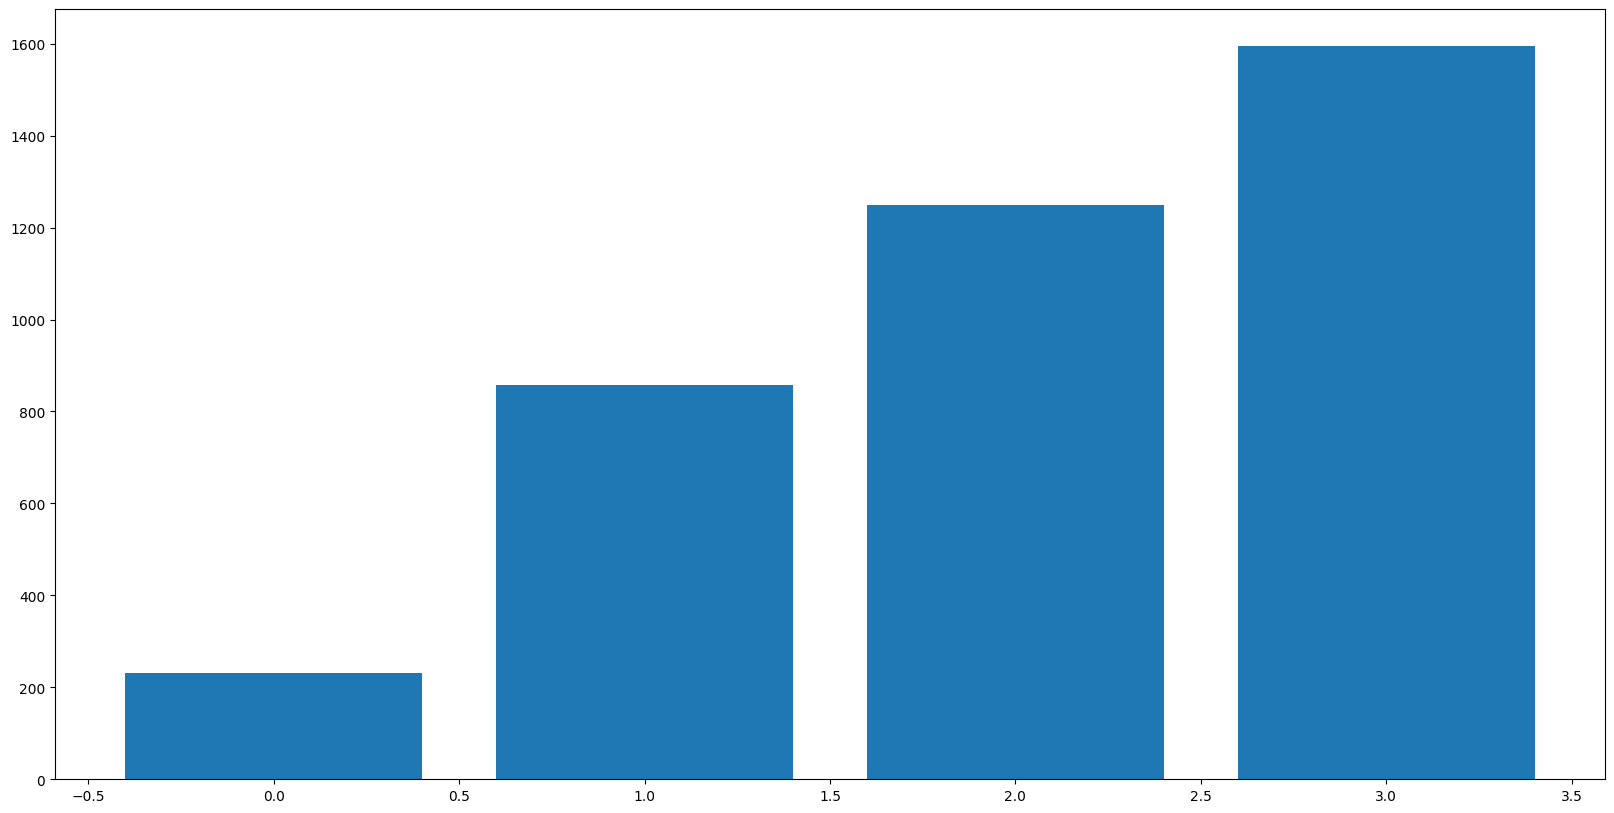

In [49]:
count = directors.groupby('item').director.count()
count_dict = {i:train[train.item.isin(count[count == i].index)].user.count() / count[count == i].count() for i in range(1, 3)}
count_dict[3] = train[train.item.isin(count[count >= 3].index)].user.count() / count[count >= 3].count()
count_dict[0] = train[train.item.isin(set(train.item.values) - set(count.index))].user.count() / train[train.item.isin(set(train.item.values) - set(count.index))].item.nunique()
plt.figure(figsize=(20, 10))
plt.bar(count_dict.keys(), count_dict.values())

writer 수에 따른 interaction의 수

In [50]:
count = writers.groupby('item').writer.count()
count_dict = {i:train[train.item.isin(count[count == i].index)].user.count() for i in range(1, count.max()+1)}
count_dict[0] = train[train.item.isin(set(train.item.values) - set(count.index))].user.count()
count_dict

{1: 1830032,
 2: 1568844,
 3: 684138,
 4: 361273,
 5: 185951,
 6: 78032,
 7: 39805,
 8: 32191,
 9: 3928,
 10: 16703,
 11: 5335,
 12: 8835,
 13: 0,
 14: 0,
 15: 720,
 16: 8709,
 17: 202,
 18: 2290,
 19: 925,
 20: 0,
 21: 10535,
 22: 0,
 23: 1060,
 24: 2271,
 0: 312692}

<BarContainer object of 25 artists>

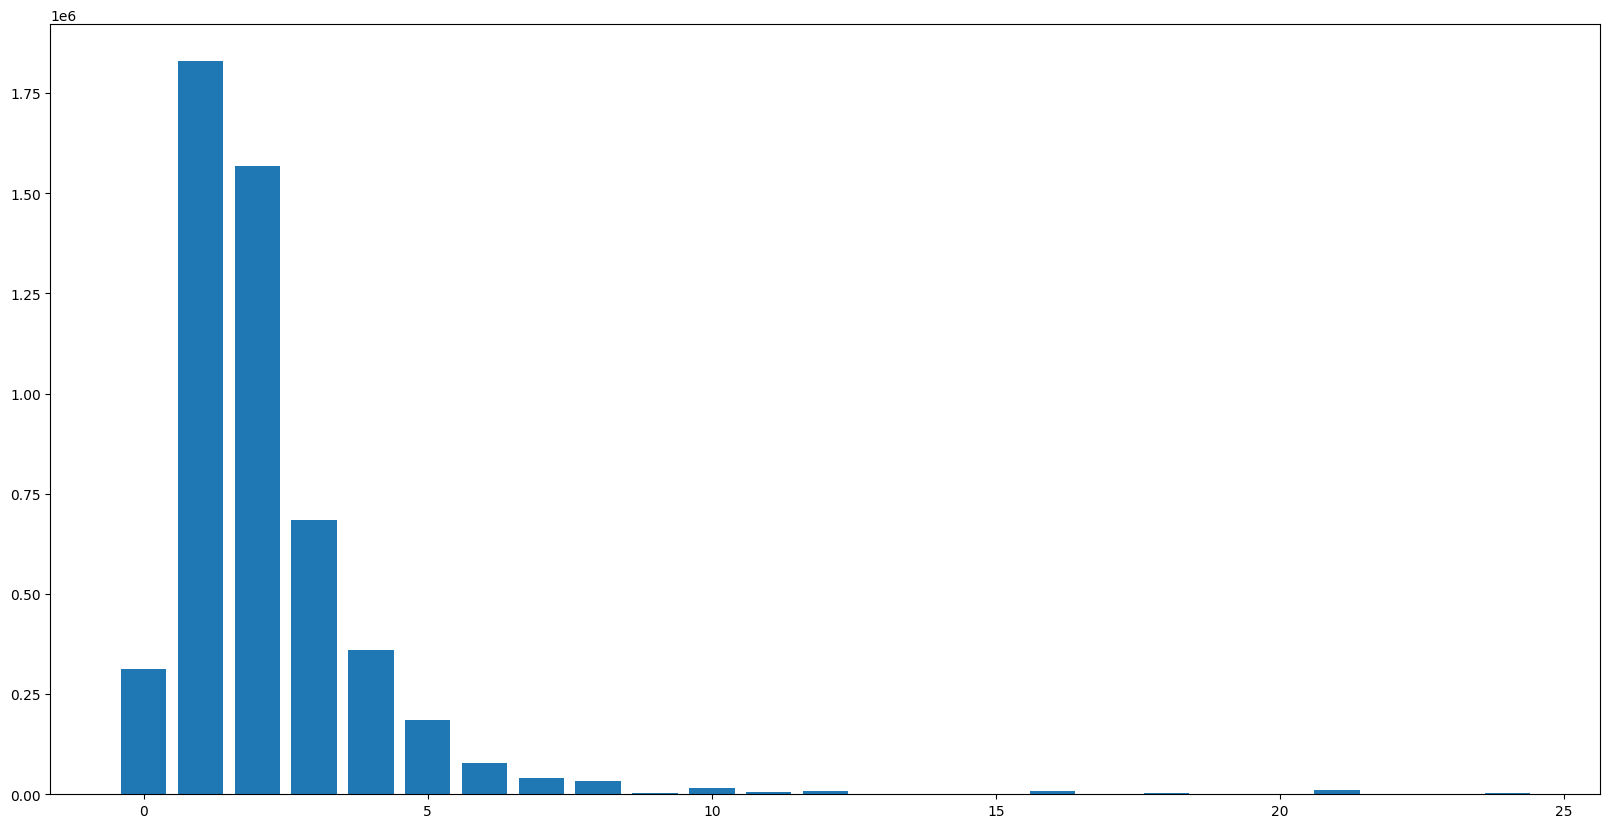

In [51]:
plt.figure(figsize=(20, 10))
plt.bar(count_dict.keys(), count_dict.values())

<BarContainer object of 21 artists>

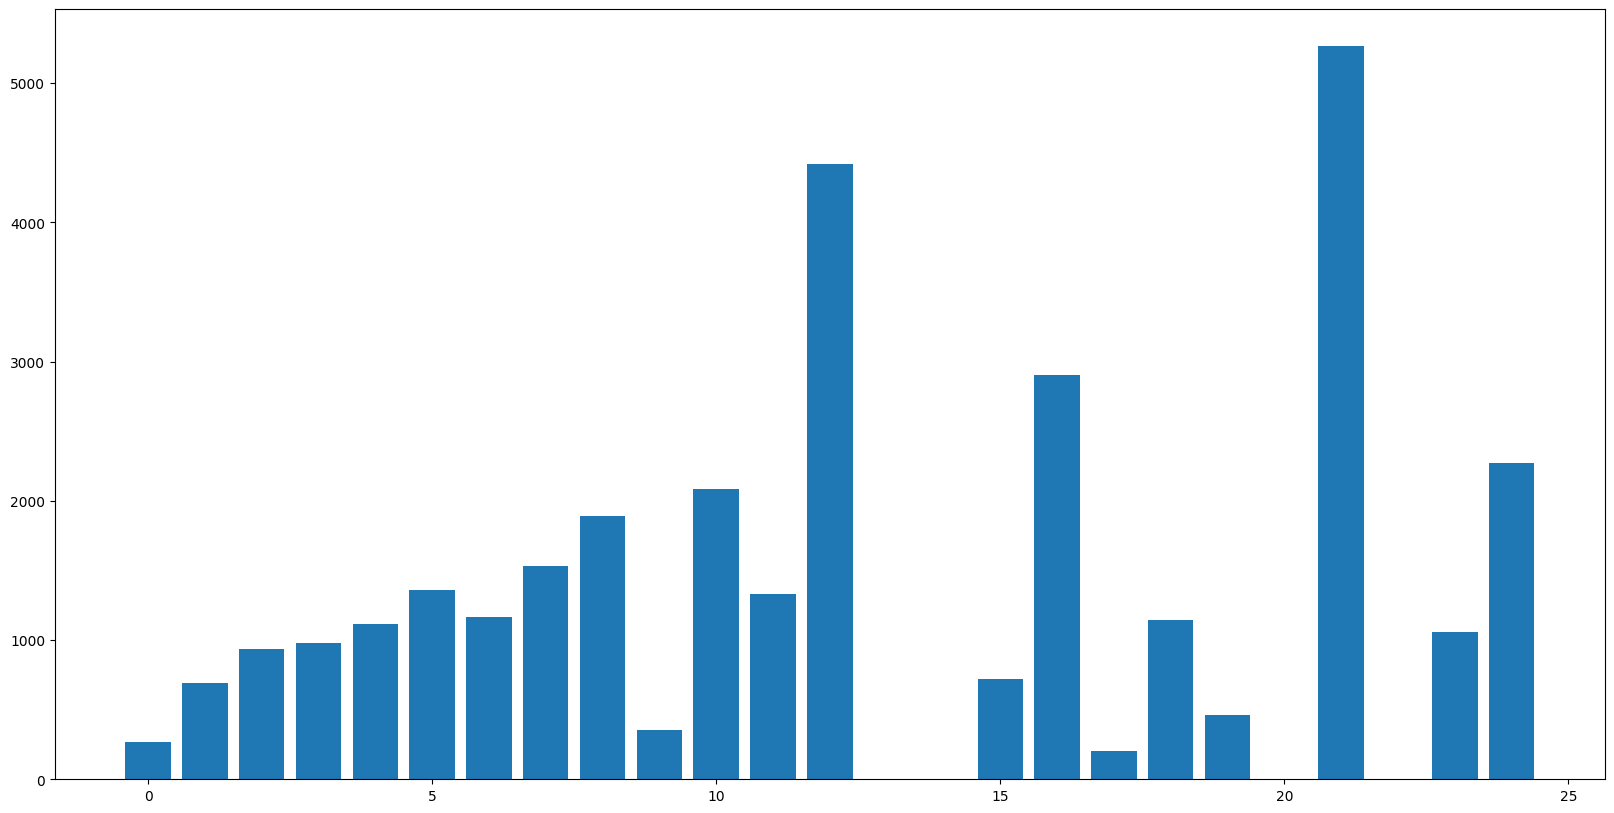

In [52]:
count = writers.groupby('item').writer.count()
count_movie = writers.groupby('item').writer.count().value_counts()
count_dict = {i:train[train.item.isin(count[count == i].index)].user.count() / count_movie[i] for i in set(count.values)}
count_dict[0] = train[train.item.isin(set(train.item.values) - set(count.index))].user.count() / train[train.item.isin(set(train.item.values) - set(count.index))].item.nunique()
plt.figure(figsize=(20, 10))
plt.bar(count_dict.keys(), count_dict.values())

In [53]:
count_movie

1     2660
2     1681
3      699
4      323
5      137
6       67
7       26
8       17
9       11
10       8
11       4
16       3
21       2
12       2
18       2
19       2
23       1
24       1
15       1
17       1
Name: writer, dtype: int64

<BarContainer object of 7 artists>

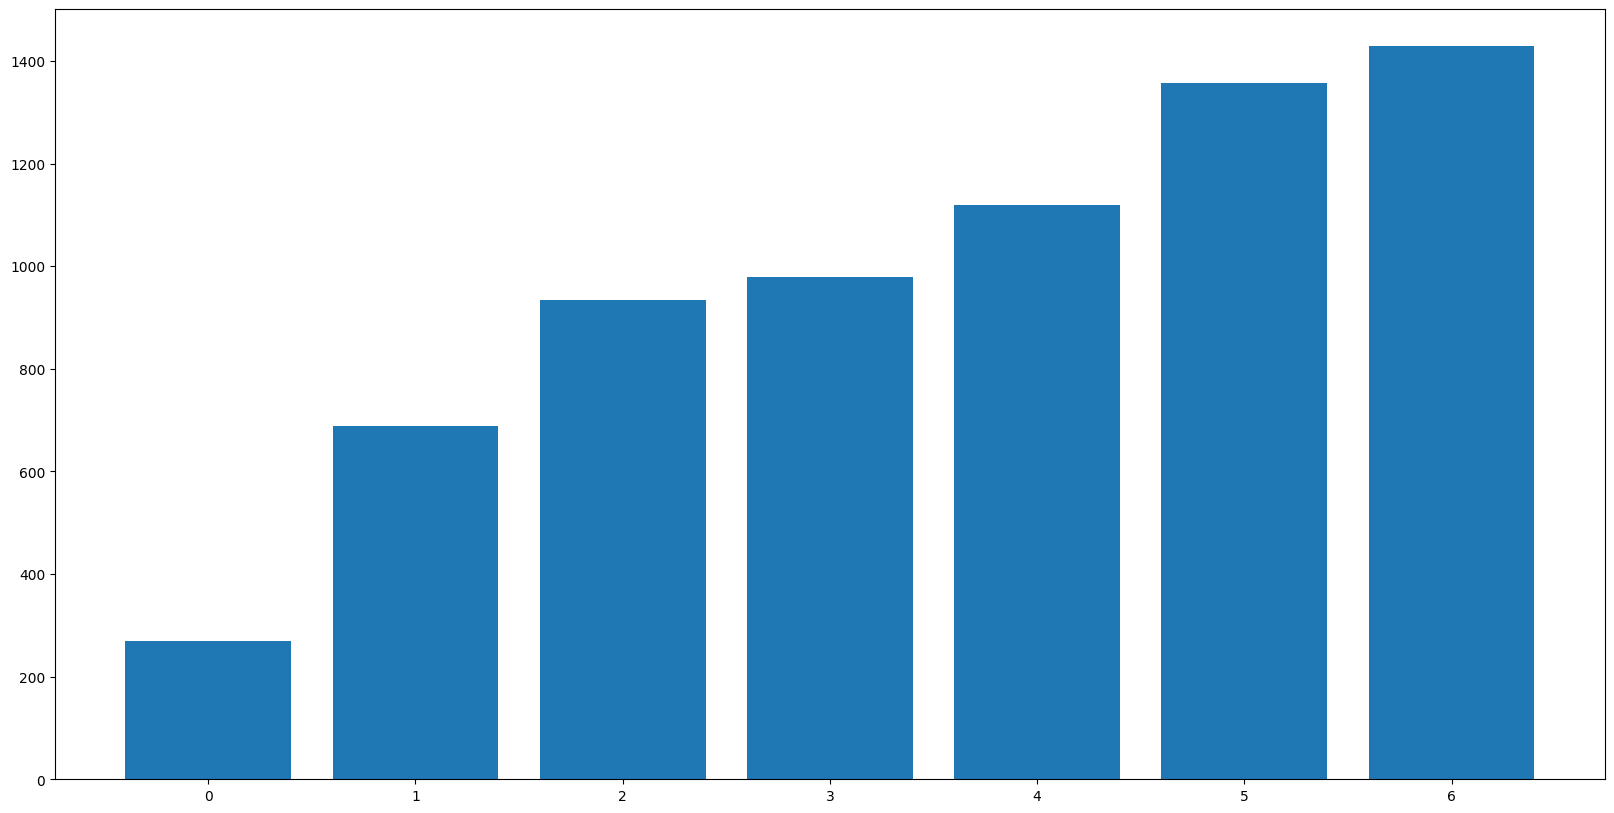

In [54]:
count = writers.groupby('item').writer.count()
count_dict = {i:train[train.item.isin(count[count == i].index)].user.count() / count[count == i].count() for i in range(1, 6)}
count_dict[6] = train[train.item.isin(count[count >= 6].index)].user.count() / count[count >= 6].count()
count_dict[0] = train[train.item.isin(set(train.item.values) - set(count.index))].user.count() / train[train.item.isin(set(train.item.values) - set(count.index))].item.nunique()
plt.figure(figsize=(20, 10))
plt.bar(count_dict.keys(), count_dict.values())

user, director별 수

In [55]:
data = pd.merge(train[['user', 'item']], directors, on='item', how='left')
data

,user,item,director
0,11,4643,nm0000318
1,11,170,nm0812200
2,11,531,nm0002140
3,11,616,nm0718627
4,11,2140,nm0000568
...,...,...,...
5708948,138493,44022,nm0757858
5708949,138493,4958,nm0601382
5708950,138493,68319,nm0004303
5708951,138493,40819,nm0003506


In [56]:
count = data[['user', 'director']].value_counts()
count_dict = {}
for u in data.user.unique() :
    count_dict[u] = count[u].index[:5].to_list()
count_dict

{11: ['nm0000229', 'nm0000709', 'nm0000318', 'nm0000386', 'nm0001392'],
 14: ['nm0000229', 'nm0000709', 'nm0661910', 'nm0414144', 'nm0005124'],
 18: ['nm0000264', 'nm0600546', 'nm0386570', 'nm0000338', 'nm0001053'],
 25: ['nm0000229', 'nm0000116', 'nm0001661', 'nm0001508', 'nm0001104'],
 31: ['nm0001392', 'nm0946734', 'nm0893659', 'nm0000184', 'nm0269463'],
 35: ['nm0000233', 'nm0000229', 'nm0001675', 'nm0001741', 'nm0027572'],
 43: ['nm0000233', 'nm0000229', 'nm0001741', 'nm0000915', 'nm0004056'],
 50: ['nm0000318', 'nm0000416', 'nm0000233', 'nm0000709', 'nm0000040'],
 58: ['nm0000229', 'nm0000416', 'nm0000318', 'nm0000142', 'nm0000233'],
 60: ['nm0946734', 'nm0001392', 'nm0001060', 'nm0661910', 'nm0576987'],
 61: ['nm0001392', 'nm0001054', 'nm0001053', 'nm0000233', 'nm0327273'],
 65: ['nm0878756', 'nm0327273', 'nm0000229', 'nm0634240', 'nm0001814'],
 72: ['nm0000040', 'nm0001129', 'nm0000709', 'nm0000116', 'nm0001661'],
 77: ['nm0000040', 'nm0000631', 'nm0000041', 'nm0455741', 'nm052

In [57]:
df = pd.DataFrame(count_dict).T.reset_index()
df.columns = ['user', 'd1', 'd2', 'd3', 'd4', 'd5']
df

,user,d1,d2,d3,d4,d5
0,11,nm0000229,nm0000709,nm0000318,nm0000386,nm0001392
1,14,nm0000229,nm0000709,nm0661910,nm0414144,nm0005124
2,18,nm0000264,nm0600546,nm0386570,nm0000338,nm0001053
3,25,nm0000229,nm0000116,nm0001661,nm0001508,nm0001104
4,31,nm0001392,nm0946734,nm0893659,nm0000184,nm0269463
...,...,...,...,...,...,...
31355,138473,nm0594503,nm0000233,nm0000318,nm0004716,nm0000399
31356,138475,nm0000033,nm0000080,nm0001328,nm0000485,nm0001379
31357,138486,nm0000709,nm0001681,nm0000229,nm0000600,nm0001060
31358,138492,nm0001661,nm0001554,nm0001054,nm0001053,nm0000500


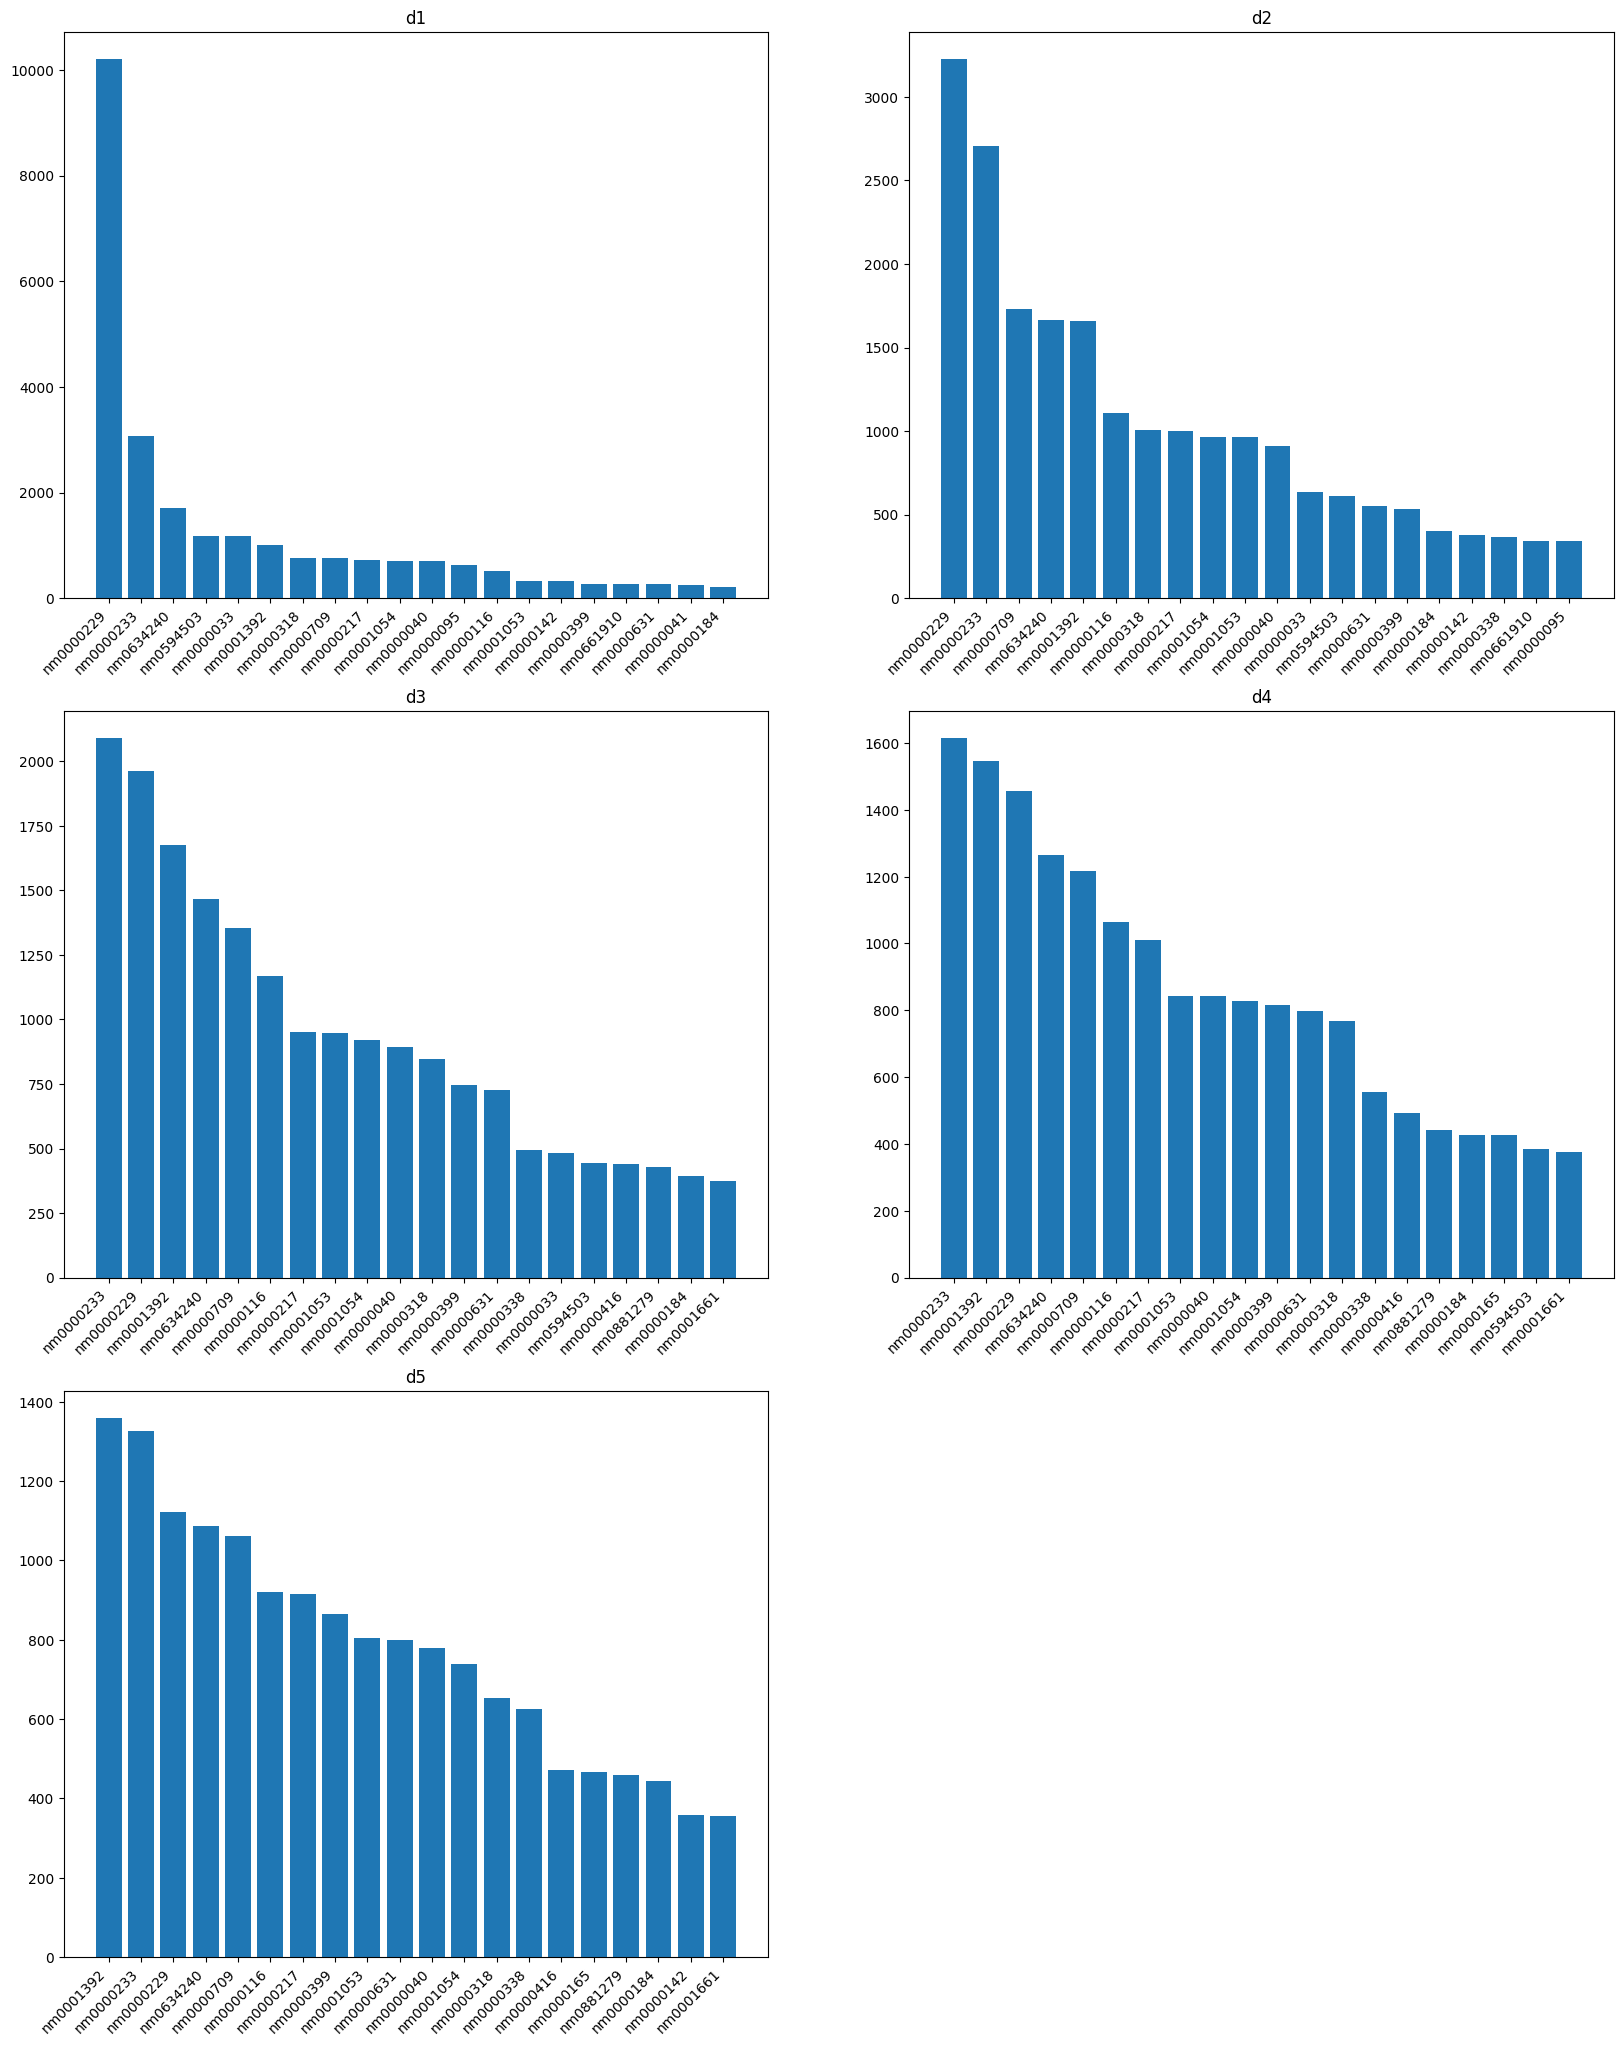

In [58]:
plt.figure(figsize=(20, 25))
index = 1
for col in ['d1', 'd2', 'd3', 'd4', 'd5'] :
    d = df[col].value_counts()[:20]
    plt.subplot(3, 2, index)
    plt.bar(d.index, d.values)
    plt.title(col)
    plt.xticks(d.index, rotation=45, ha='right')
    index += 1

director, writer 명 수에 따른 genre의 수

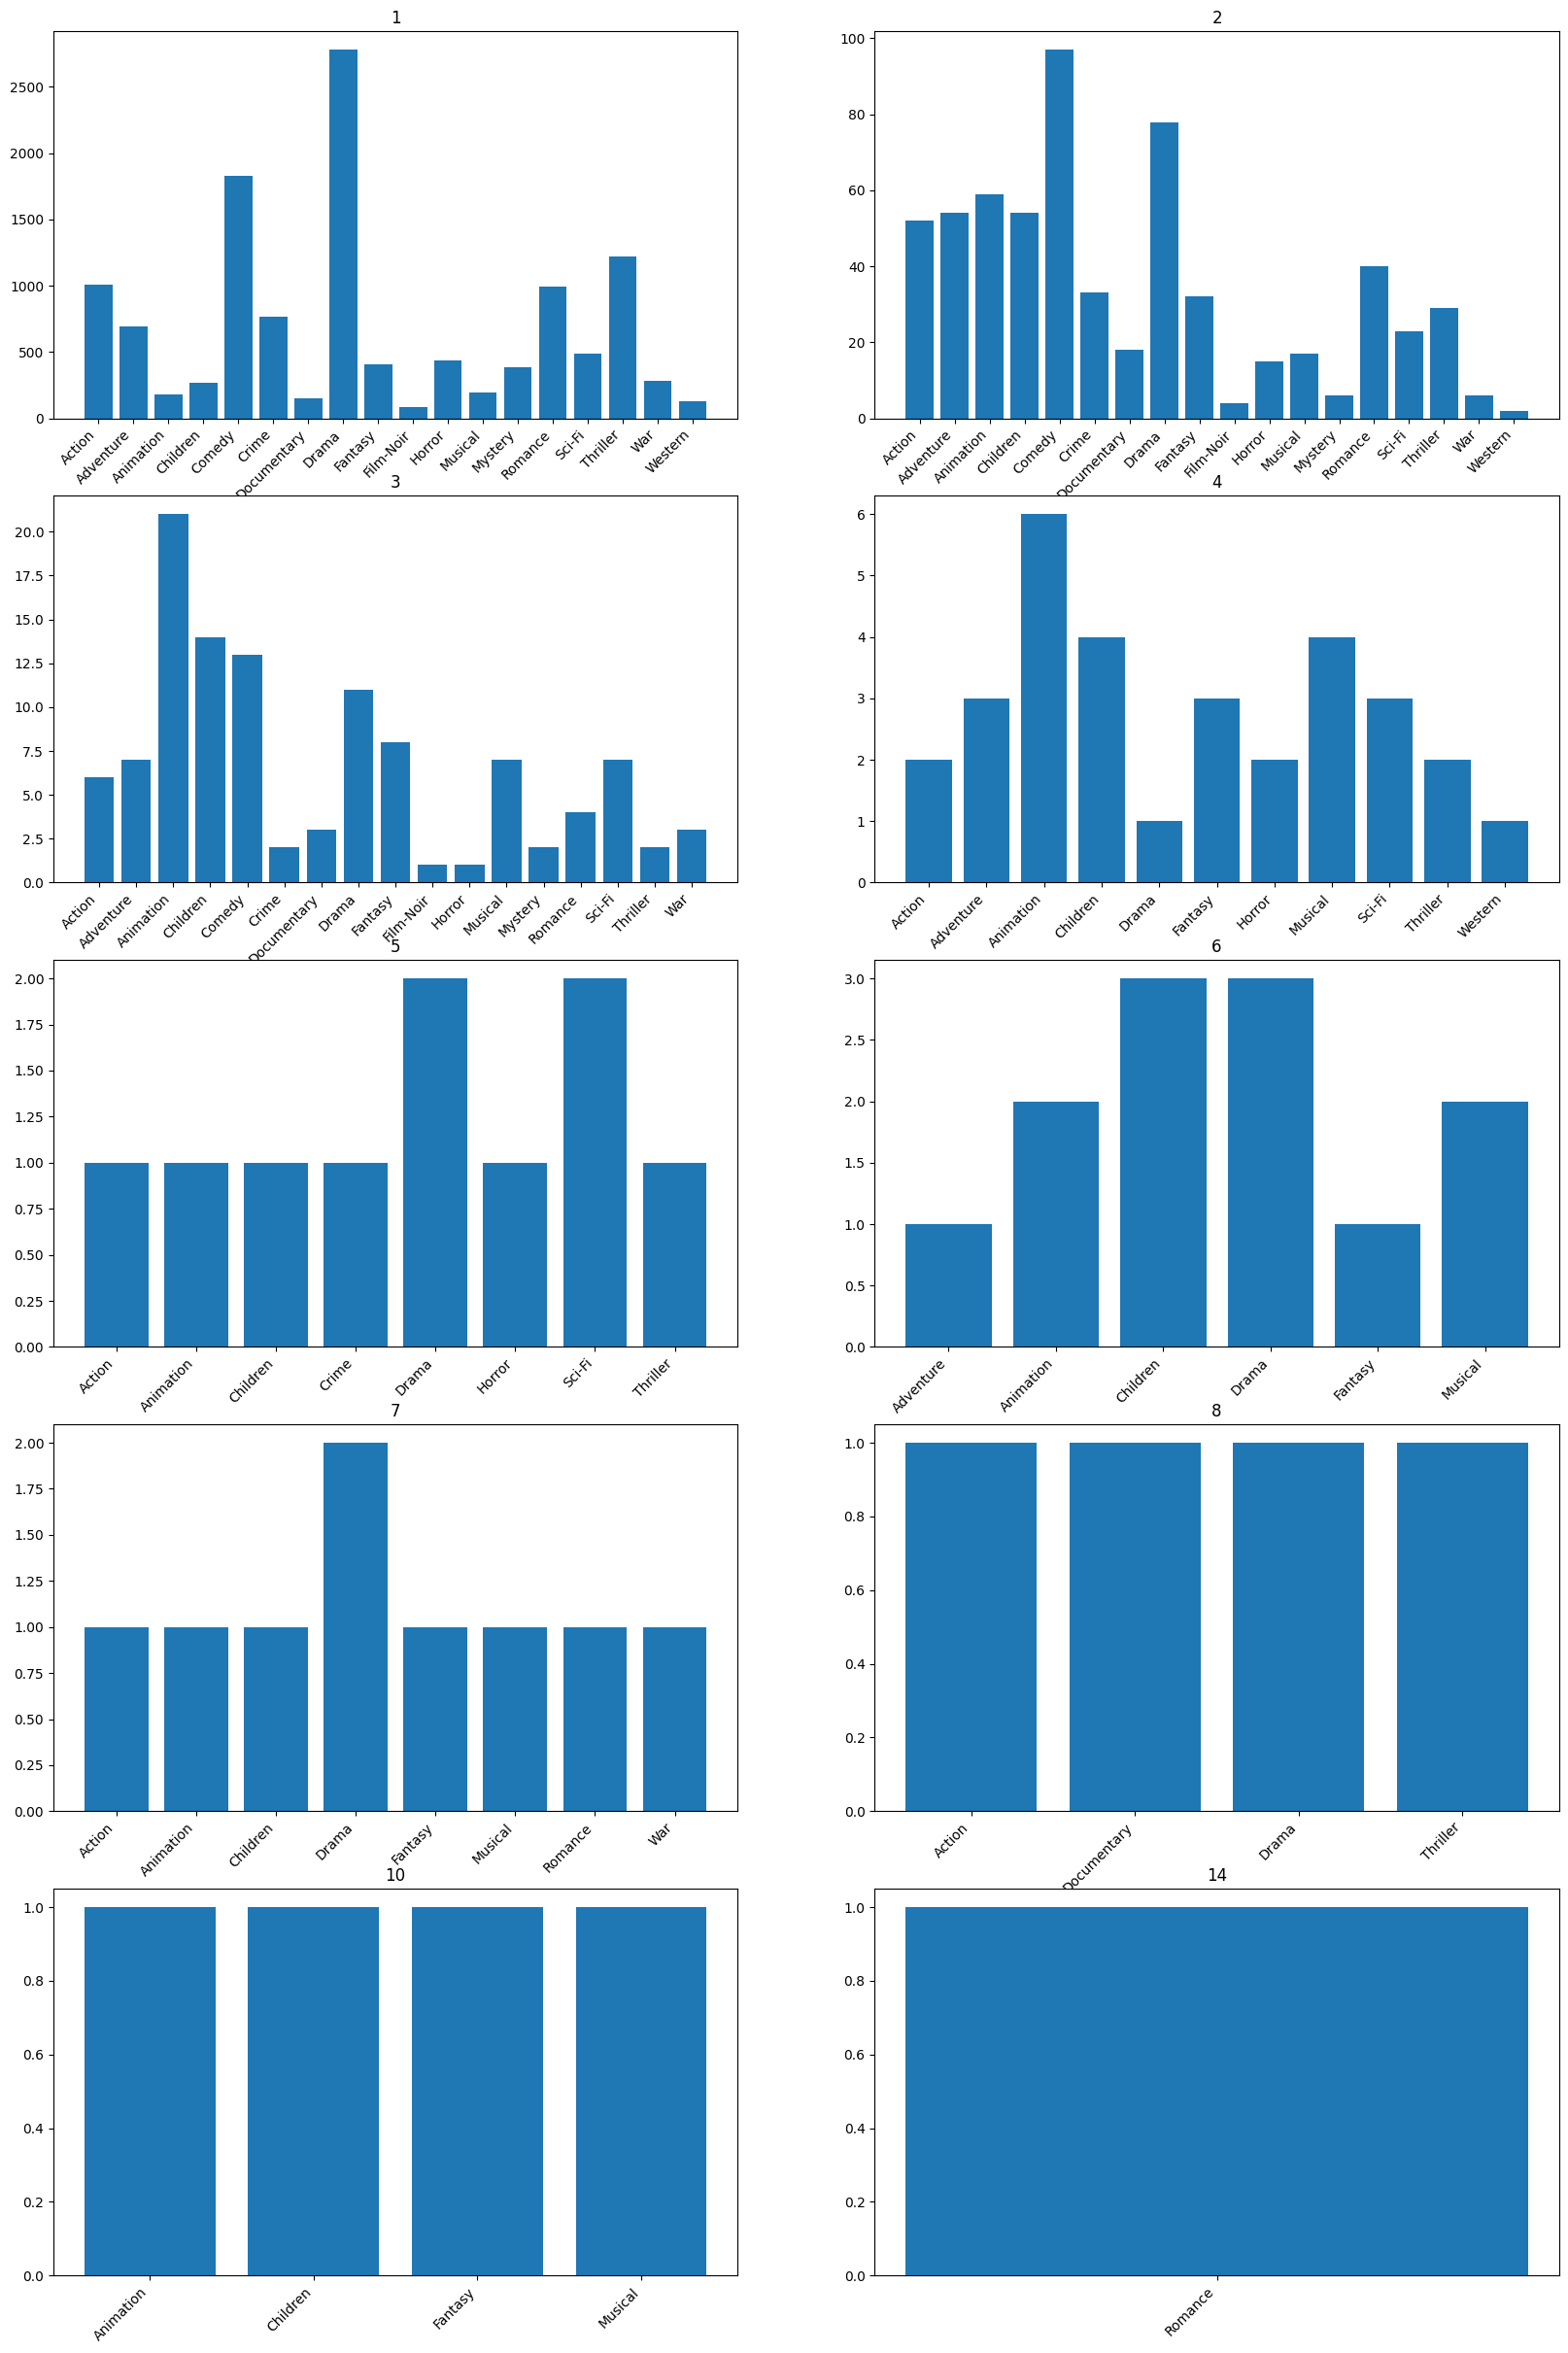

In [59]:
count = directors.groupby('item').director.count()
plt.figure(figsize=(20, 30))
index = 1
for i in set(count.values) :
    d = genres[genres.item.isin(count[count == i].index)].groupby('genre').item.count()
    
    plt.subplot(5, 2, index)
    plt.bar(d.index, d.values)
    plt.title(i)
    plt.xticks(d.index, rotation=45, ha='right')

    index += 1

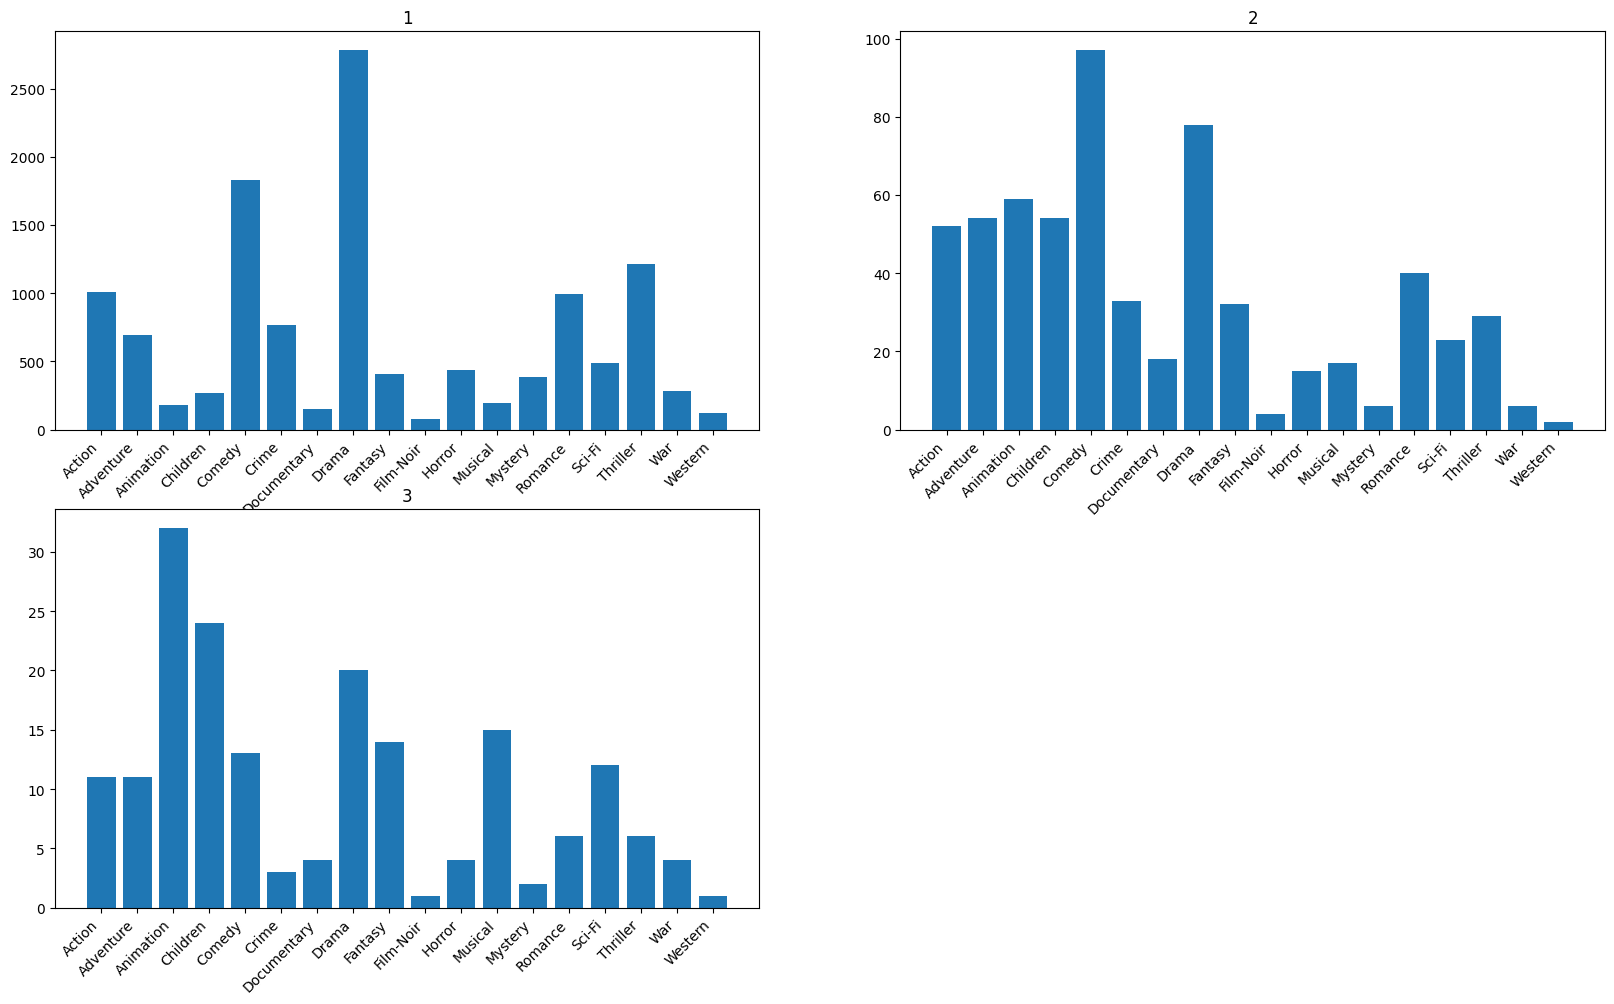

In [66]:
count = directors.groupby('item').director.count()
plt.figure(figsize=(20, 30))
index = 1
for i in range(1, 3) :
    d = genres[genres.item.isin(count[count == i].index)].groupby('genre').item.count()
    
    plt.subplot(5, 2, index)
    plt.bar(d.index, d.values)
    plt.title(i)
    plt.xticks(d.index, rotation=45, ha='right')

    index += 1


d = genres[genres.item.isin(count[count >= 3].index)].groupby('genre').item.count()

plt.subplot(5, 2, index)
plt.bar(d.index, d.values)
plt.title(3)
plt.xticks(d.index, rotation=45, ha='right')

index += 1

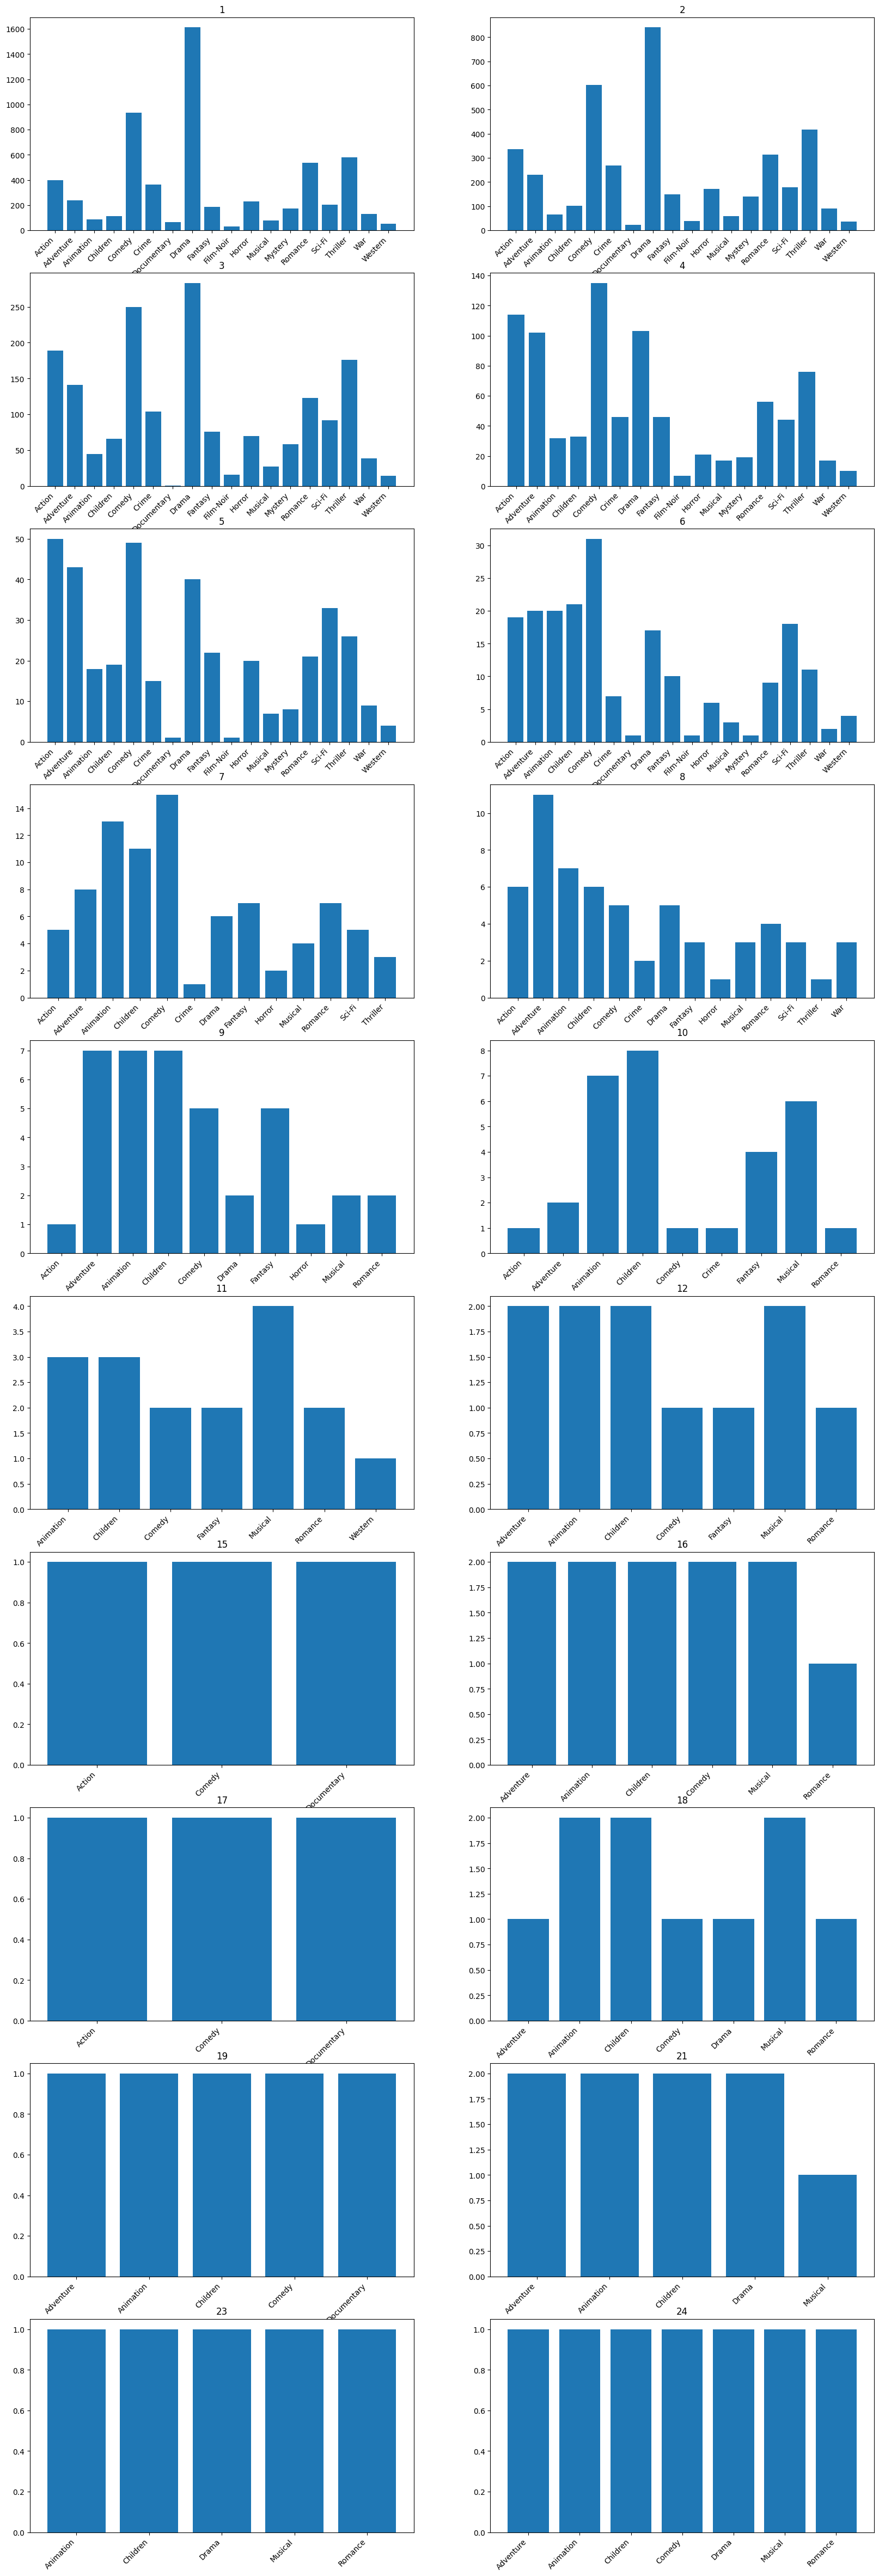

In [62]:
count = writers.groupby('item').writer.count()
plt.figure(figsize=(20, 60))
index = 1
for i in set(count.values) :
    d = genres[genres.item.isin(count[count == i].index)].groupby('genre').item.count()
    
    plt.subplot(10, 2, index)
    plt.bar(d.index, d.values)
    plt.title(i)
    plt.xticks(d.index, rotation=45, ha='right')

    index += 1

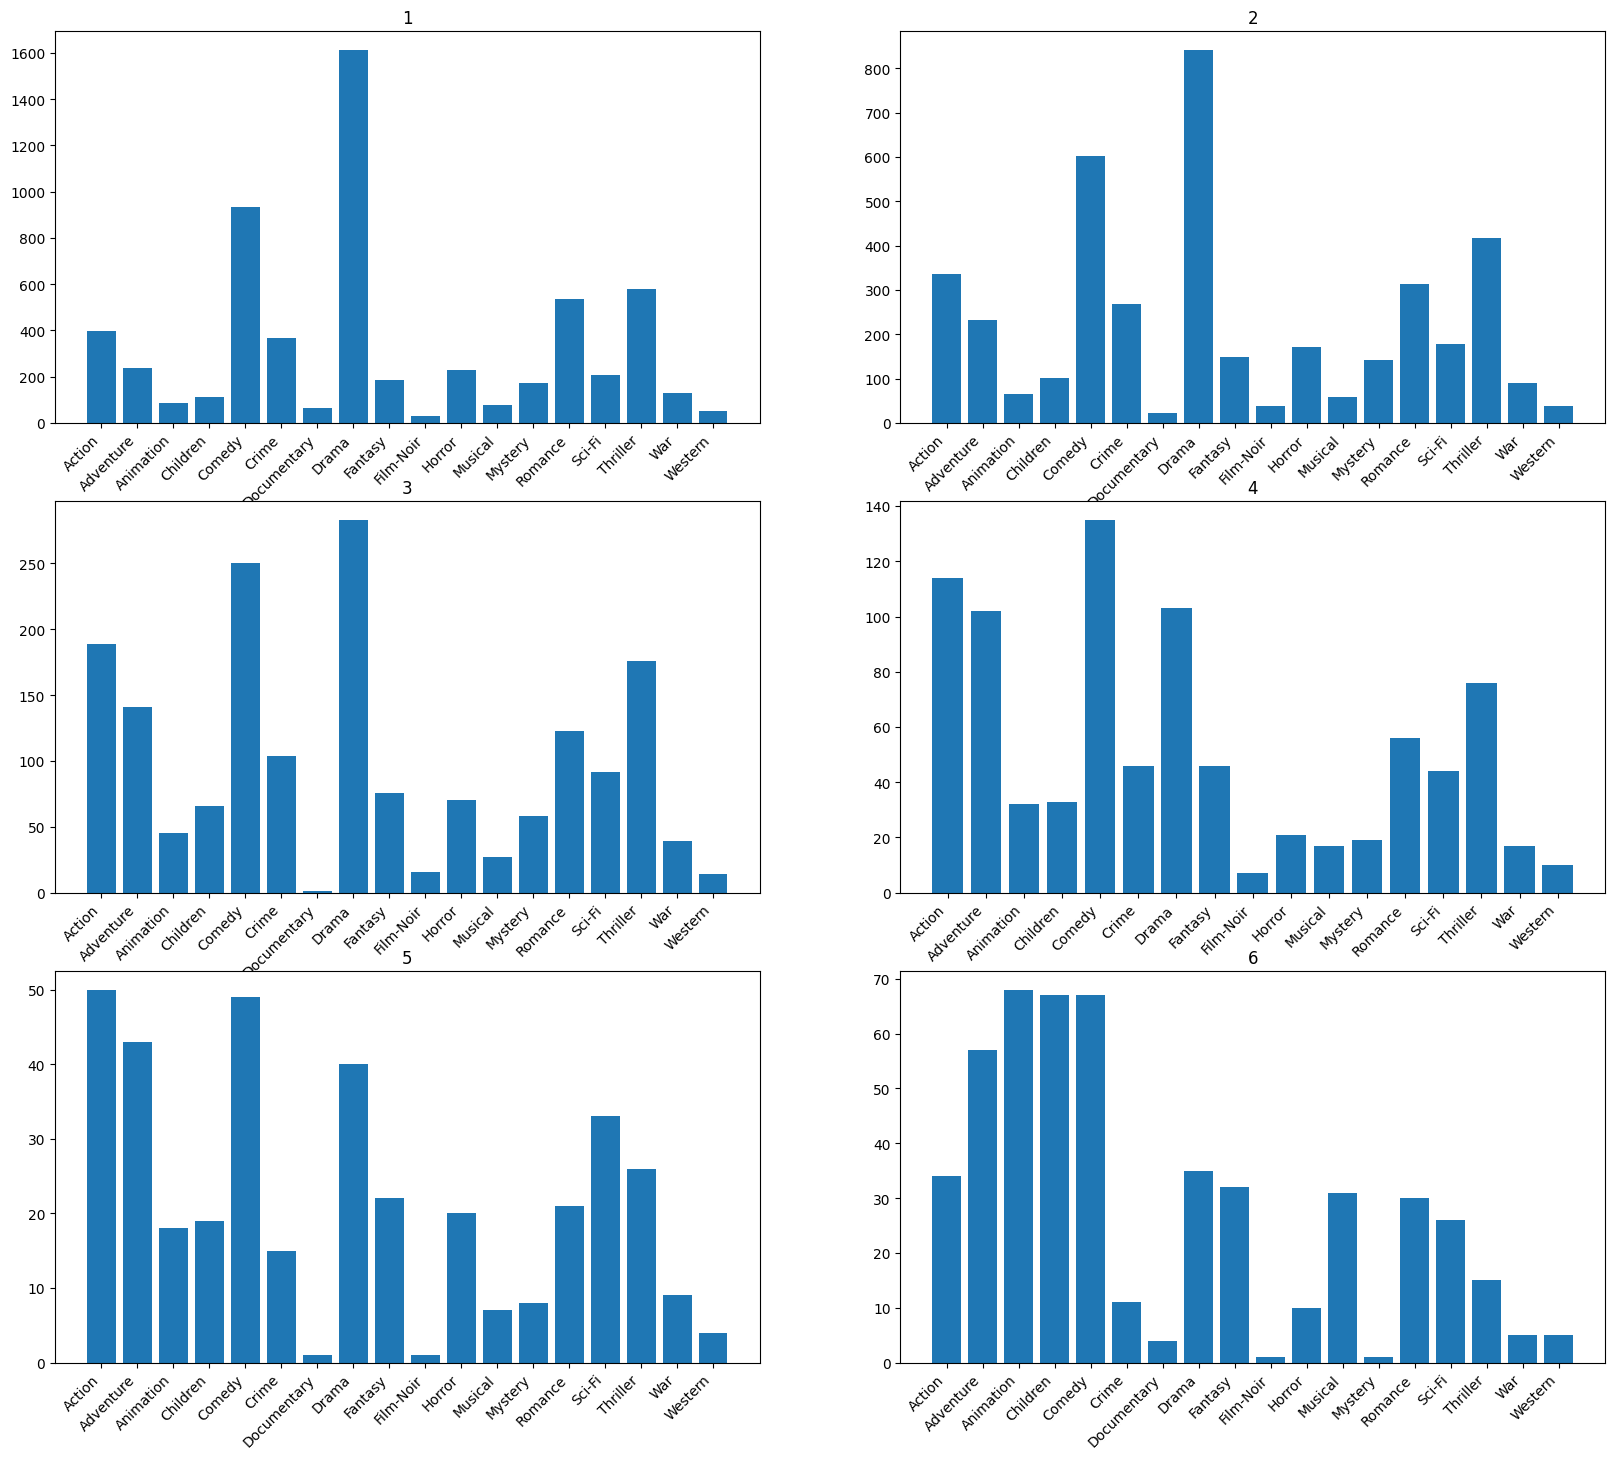

In [63]:
count = writers.groupby('item').writer.count()
plt.figure(figsize=(20, 60))
index = 1
for i in range(1, 6) :
    d = genres[genres.item.isin(count[count == i].index)].groupby('genre').item.count()
    
    plt.subplot(10, 2, index)
    plt.bar(d.index, d.values)
    plt.title(i)
    plt.xticks(d.index, rotation=45, ha='right')

    index += 1

d = genres[genres.item.isin(count[count >= 6].index)].groupby('genre').item.count()

plt.subplot(10, 2, index)
plt.bar(d.index, d.values)
plt.title(6)
plt.xticks(d.index, rotation=45, ha='right')

index += 1

In [64]:
f"sparsity: {len(train.index) / (train.user.nunique() * train.item.nunique()) * 100: .4f}%"

'sparsity:  2.4146%'